In [87]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
import os

from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, Dropout, LSTM
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import cross_validate,GridSearchCV
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
#from sklearn.feature_extraction import DictVectorizer
#from sklearn.utils.multiclass import unique_labels
# import scikitplot as skplt
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt.expected_returns import ema_historical_return
from pypfopt.risk_models import exp_cov
from pypfopt.efficient_frontier import EfficientFrontier
from pypfopt.plotting import plot_efficient_frontier
from pypfopt.plotting import plot_weights
from pypfopt.cla import CLA

import plotly.express as px

#os.chdir(r'N:\STOCK ADVISOR BOT')

In [88]:

def prepare_lagged_features(df_Stock, lag_stock =20, lag_index =5):

        print('Preparing Lagged Features for Stock, Index Funds.....')
        lags = range(1, lag_stock+1)
        lag_cols= ['Close']
        df_Stock=df_Stock.assign(**{
            '{}(t-{})'.format(col, l): df_Stock[col].shift(l)
            for l in lags
            for col in lag_cols
        })

       
        lags = range(1, lag_index+1)
        lag_cols= ['QQQ_Close','SnP_Close','DJIA_Close']
        df_Stock= df_Stock.assign(**{
            '{}(t-{})'.format(col, l): df_Stock[col].shift(l)
            for l in lags
            for col in lag_cols
        })

        df_Stock = df_Stock.drop(columns=lag_cols)


        remove_lags_na = max(lag_stock, lag_index) + 1
        print('Removing NAN rows - ', str(remove_lags_na))
        df_Stock = df_Stock.iloc[remove_lags_na:,]
        return df_Stock

    
    
def get_mape(y_true, y_pred): 
        """
        Compute mean absolute percentage error (MAPE)
        """
        y_true, y_pred = np.array(y_true), np.array(y_pred)
        return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

'''
for i in range(4):
    print(i)
    #name='v'+str(i)
    locals()['v'+str(i)]=i+i
    print(locals()['v'+str(i)])
'''


"\nfor i in range(4):\n    print(i)\n    #name='v'+str(i)\n    locals()['v'+str(i)]=i+i\n    print(locals()['v'+str(i)])\n"

# buy and hold

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_75"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_150 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_151 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_75 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 13s - loss: 0.0057
Epoch 2/25
479/479 - 9s - loss: 0.0035
Epoch 3/25
479/479 - 10s - loss: 0.0037
Epoch 4/25
479/479 - 10s - loss: 0.0032
Epoch 5/25
479/479 - 10s - loss: 0.0029
Epoch 6/25
479/479 - 9s - loss: 0.0029
Epoch 7/25
479/479 - 10s - loss: 0.0031
Epoch 8/25
4

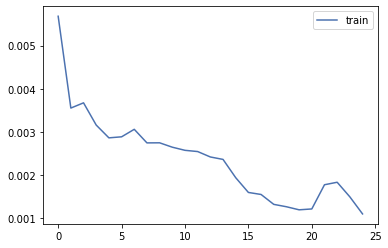

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_76"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_152 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_153 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_76 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0114
Epoch 2/25
479/479 - 8s - loss: 0.0082
Epoch 3/25
479/479 - 8s - loss: 0.0076
Epoch 4/25
479/479 - 8s - loss: 0.0073
Epoch 5/25
479/479 - 8s - loss: 0.0071
Epoch 6/25
479/479 - 8s - loss: 0.0070
Epoch 7/25
479/479 - 8s - loss: 0.0067
Epoch 8/25
479/4

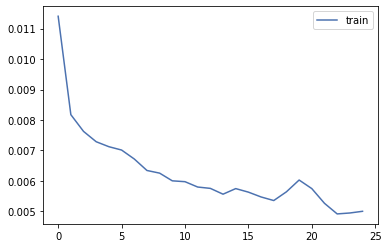

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_77"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_154 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_155 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_77 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0154
Epoch 2/25
479/479 - 8s - loss: 0.0107
Epoch 3/25
479/479 - 8s - loss: 0.0098
Epoch 4/25
479/479 - 8s - loss: 0.0096
Epoch 5/25
479/479 - 8s - loss: 0.0090
Epoch 6/25
479/479 - 8s - loss: 0.0086
Epoch 7/25
479/479 - 8s - loss: 0.0084
Epoch 8/25
479/47

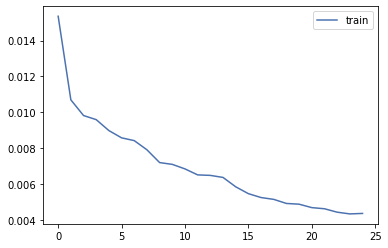

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_78"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_156 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_157 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_78 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0099
Epoch 2/25
479/479 - 8s - loss: 0.0047
Epoch 3/25
479/479 - 8s - loss: 0.0039
Epoch 4/25
479/479 - 8s - loss: 0.0040
Epoch 5/25
479/479 - 8s - loss: 0.0040
Epoch 6/25
479/479 - 8s - loss: 0.0039
Epoch 7/25
479/479 - 8s - loss: 0.0037
Epoch 8/25
479/479

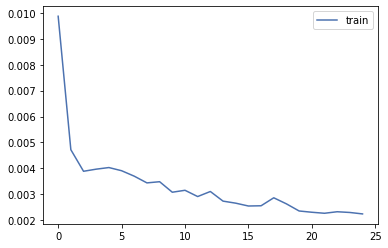

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_79"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_158 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_159 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_79 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0172
Epoch 2/25
479/479 - 9s - loss: 0.0092
Epoch 3/25
479/479 - 10s - loss: 0.0086
Epoch 4/25
479/479 - 10s - loss: 0.0083
Epoch 5/25
479/479 - 10s - loss: 0.0081
Epoch 6/25
479/479 - 9s - loss: 0.0082
Epoch 7/25
479/479 - 9s - loss: 0.0077
Epoch 8/25
47

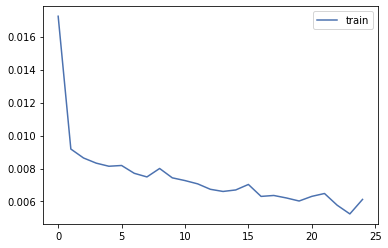

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_80"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_160 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_161 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_80 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0080
Epoch 2/25
479/479 - 8s - loss: 0.0063
Epoch 3/25
479/479 - 8s - loss: 0.0052
Epoch 4/25
479/479 - 10s - loss: 0.0049
Epoch 5/25
479/479 - 10s - loss: 0.0047
Epoch 6/25
479/479 - 10s - loss: 0.0048
Epoch 7/25
479/479 - 10s - loss: 0.0047
Epoch 8/25
4

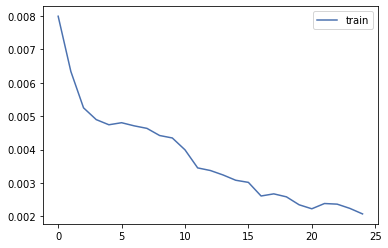

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_81"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_162 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_163 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_81 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0109
Epoch 2/25
479/479 - 8s - loss: 0.0053
Epoch 3/25
479/479 - 8s - loss: 0.0049
Epoch 4/25
479/479 - 8s - loss: 0.0052
Epoch 5/25
479/479 - 8s - loss: 0.0048
Epoch 6/25
479/479 - 8s - loss: 0.0047
Epoch 7/25
479/479 - 9s - loss: 0.0048
Epoch 8/25
479/4

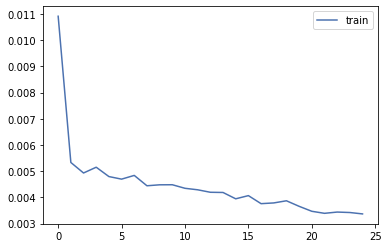

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_82"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_164 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_165 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_82 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0088
Epoch 2/25
479/479 - 8s - loss: 0.0064
Epoch 3/25
479/479 - 8s - loss: 0.0049
Epoch 4/25
479/479 - 9s - loss: 0.0049
Epoch 5/25
479/479 - 9s - loss: 0.0046
Epoch 6/25
479/479 - 9s - loss: 0.0045
Epoch 7/25
479/479 - 8s - loss: 0.0044
Epoch 8/25
479/4

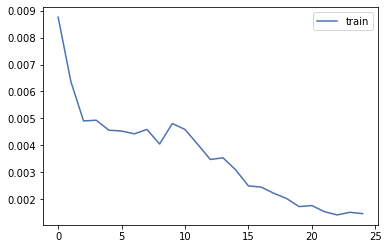

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_83"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_166 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_167 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_83 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 12s - loss: 0.0109
Epoch 2/25
479/479 - 9s - loss: 0.0067
Epoch 3/25
479/479 - 9s - loss: 0.0057
Epoch 4/25
479/479 - 8s - loss: 0.0055
Epoch 5/25
479/479 - 8s - loss: 0.0052
Epoch 6/25
479/479 - 8s - loss: 0.0051
Epoch 7/25
479/479 - 8s - loss: 0.0052
Epoch 8/25
479/4

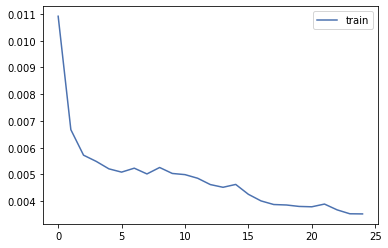

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_84"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_168 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_169 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_84 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0088
Epoch 2/25
479/479 - 8s - loss: 0.0054
Epoch 3/25
479/479 - 8s - loss: 0.0054
Epoch 4/25
479/479 - 8s - loss: 0.0053
Epoch 5/25
479/479 - 9s - loss: 0.0047
Epoch 6/25
479/479 - 9s - loss: 0.0050
Epoch 7/25
479/479 - 9s - loss: 0.0046
Epoch 8/25
479/4

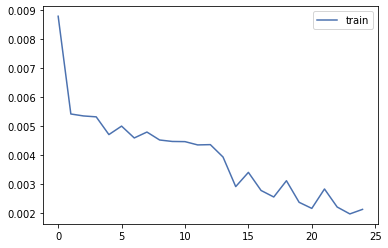

In [89]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-100)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L:,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[:L,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L:,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=150))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [90]:

#NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred1 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred1['NEE'].pct_change()
DUK_daily_returns = TEST_pred1['DUK'].pct_change()

SO_daily_returns = TEST_pred1['SO'].pct_change()
D_daily_returns = TEST_pred1['D'].pct_change()

EXC_daily_returns = TEST_pred1['EXC'].pct_change()
AEP_daily_returns = TEST_pred1['AEP'].pct_change()

SRE_daily_returns = TEST_pred1['SRE'].pct_change()
XEL_daily_returns = TEST_pred1['XEL'].pct_change()

PEG_daily_returns = TEST_pred1['PEG'].pct_change()
WEC_daily_returns = TEST_pred1['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred1 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred1 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred1 = TESTDailyReturn_pred1
atx_comps_rets_cumprod_pred1 = TESTCUM_pred1

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred1, x=atx_comps_rets_cumprod_pred1.index, y=atx_comps_rets_cumprod_pred1.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred1, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred1, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred1 = EfficientFrontier(mu, Sigma)
    ef_pred1.efficient_return(i)
    vol_ef.append(ef_pred1.portfolio_performance()[1])

ef_pred1 = EfficientFrontier(mu, Sigma)
ef_pred1.min_volatility()
min_vol_ret = ef_pred1.portfolio_performance()[0]
min_vol_vol = ef_pred1.portfolio_performance()[1]

ef_pred1.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred1.portfolio_performance()[0]
max_sharpe_vol = ef_pred1.portfolio_performance()[1]


portfolioREAL_Pred1 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)





Expected annual return: 8.1%
Annual volatility: 8.5%
Sharpe Ratio: 0.85


(0.08105499244404923, 0.08501409952816469, 0.8475652020542526)

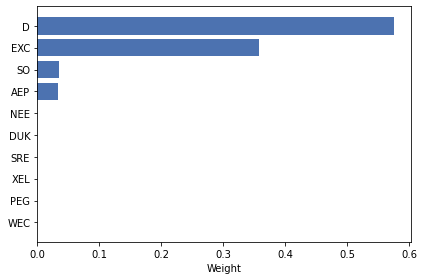

In [91]:

ef_pred1 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred1 = ef_pred1.min_volatility()

plot_weights(raw_weights_minvar_exp_pred1)
ef_pred1.portfolio_performance(verbose = True, risk_free_rate = 0.009)




Expected annual return: 26.3%
Annual volatility: 16.5%
Sharpe Ratio: 1.54


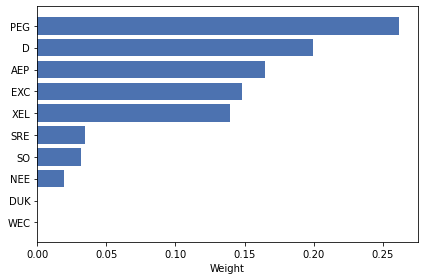

In [92]:
ef_pred1 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred1.max_sharpe(risk_free_rate=0.009)
Weight_Pred1  = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred1,AV1_Pred1,SR1_Pred1=ef_pred1.portfolio_performance(verbose = True, risk_free_rate = 0.009)


In [93]:
Weight_Pred1= raw_weights_maxsharpe_exp.values()

LISTValue_Pred1= list(Weight_Pred1)

SUMpredict_Pred1 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred1))*np.mat(np.array(SUMpredict_Pred1))

per_Pred1 = pd.DataFrame(hhhhh.T,columns = ['per_Pred1'])


In [94]:

PortfolioREAL_Daily_Return_Pred1 = portfolioREAL_Pred1.pct_change()

PortfolioREAL_cum_returns_Pred1 = (PortfolioREAL_Daily_Return_Pred1 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred1))*(np.mat(np.array(LISTValue_Pred1)).T)

perreal_Pred1 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred1'])

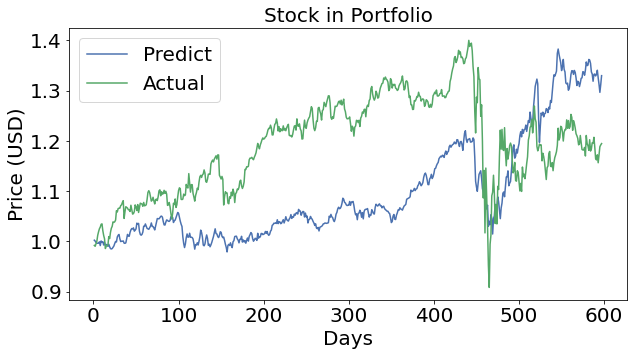

In [95]:
#---------------------------------------------------------------------------------------------#
plt.figure(figsize=(10,5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Price (USD)', fontsize=20)
plt.xlabel('Days', fontsize=20)

plt.plot(per_Pred1['per_Pred1'])

plt.plot(perreal_Pred1['PerReal_Pred1'])


plt.legend(['Predict','Actual'], loc='upper left', fontsize=20)
#df_pred[['Actual', 'Predicted']].plot()
plt.title('Stock in Portfolio', fontsize=20)
plt.show()

# period 1

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_85"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_170 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_171 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_85 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0066
Epoch 2/25
479/479 - 9s - loss: 0.0035
Epoch 3/25
479/479 - 9s - loss: 0.0034
Epoch 4/25
479/479 - 8s - loss: 0.0032
Epoch 5/25
479/479 - 8s - loss: 0.0029
Epoch 6/25
479/479 - 8s - loss: 0.0026
Epoch 7/25
479/479 - 8s - loss: 0.0029
Epoch 8/25
479/4

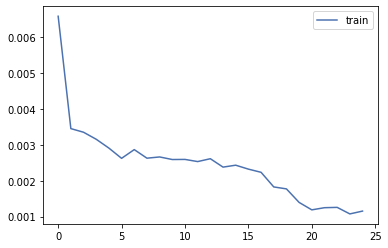

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_86"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_172 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_173 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_86 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0134
Epoch 2/25
479/479 - 8s - loss: 0.0081
Epoch 3/25
479/479 - 8s - loss: 0.0078
Epoch 4/25
479/479 - 8s - loss: 0.0076
Epoch 5/25
479/479 - 8s - loss: 0.0069
Epoch 6/25
479/479 - 8s - loss: 0.0070
Epoch 7/25
479/479 - 8s - loss: 0.0066
Epoch 8/25
479/4

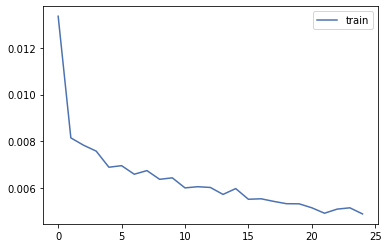

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_87"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_174 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_175 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_87 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0188
Epoch 2/25
479/479 - 8s - loss: 0.0118
Epoch 3/25
479/479 - 8s - loss: 0.0110
Epoch 4/25
479/479 - 8s - loss: 0.0101
Epoch 5/25
479/479 - 8s - loss: 0.0100
Epoch 6/25
479/479 - 8s - loss: 0.0096
Epoch 7/25
479/479 - 8s - loss: 0.0091
Epoch 8/25
479/47

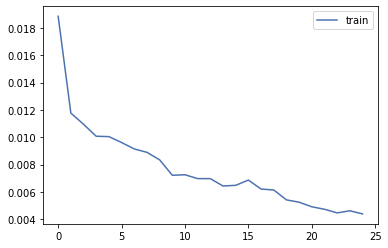

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_88"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_176 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_177 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_88 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0082
Epoch 2/25
479/479 - 8s - loss: 0.0047
Epoch 3/25
479/479 - 8s - loss: 0.0041
Epoch 4/25
479/479 - 8s - loss: 0.0039
Epoch 5/25
479/479 - 8s - loss: 0.0036
Epoch 6/25
479/479 - 8s - loss: 0.0036
Epoch 7/25
479/479 - 8s - loss: 0.0036
Epoch 8/25
479/479

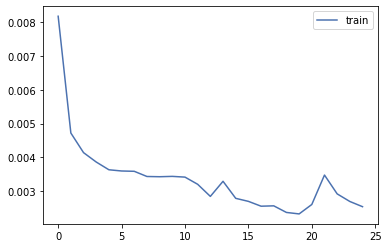

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_89"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_178 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_179 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_89 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0168
Epoch 2/25
479/479 - 8s - loss: 0.0091
Epoch 3/25
479/479 - 8s - loss: 0.0087
Epoch 4/25
479/479 - 8s - loss: 0.0083
Epoch 5/25
479/479 - 8s - loss: 0.0084
Epoch 6/25
479/479 - 8s - loss: 0.0077
Epoch 7/25
479/479 - 8s - loss: 0.0079
Epoch 8/25
479/4

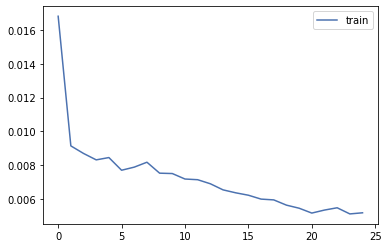

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_90"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_180 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_181 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_90 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0084
Epoch 2/25
479/479 - 8s - loss: 0.0058
Epoch 3/25
479/479 - 8s - loss: 0.0052
Epoch 4/25
479/479 - 8s - loss: 0.0053
Epoch 5/25
479/479 - 8s - loss: 0.0049
Epoch 6/25
479/479 - 8s - loss: 0.0048
Epoch 7/25
479/479 - 8s - loss: 0.0049
Epoch 8/25
479/4

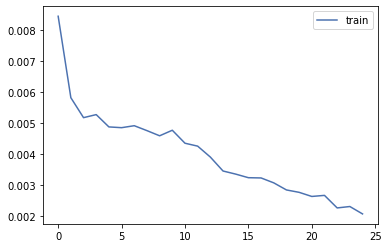

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_91"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_182 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_183 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_91 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0130
Epoch 2/25
479/479 - 8s - loss: 0.0056
Epoch 3/25
479/479 - 8s - loss: 0.0052
Epoch 4/25
479/479 - 8s - loss: 0.0051
Epoch 5/25
479/479 - 8s - loss: 0.0049
Epoch 6/25
479/479 - 8s - loss: 0.0048
Epoch 7/25
479/479 - 8s - loss: 0.0046
Epoch 8/25
479/4

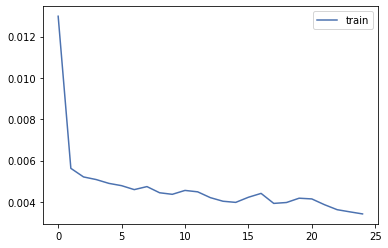

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_92"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_184 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_185 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_92 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0092
Epoch 2/25
479/479 - 8s - loss: 0.0059
Epoch 3/25
479/479 - 8s - loss: 0.0048
Epoch 4/25
479/479 - 8s - loss: 0.0052
Epoch 5/25
479/479 - 8s - loss: 0.0048
Epoch 6/25
479/479 - 8s - loss: 0.0047
Epoch 7/25
479/479 - 8s - loss: 0.0046
Epoch 8/25
479/4

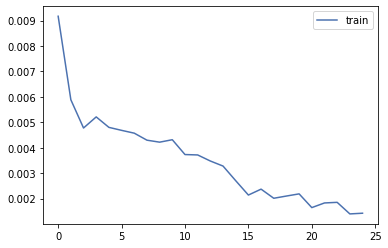

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_93"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_186 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_187 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_93 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0096
Epoch 2/25
479/479 - 8s - loss: 0.0071
Epoch 3/25
479/479 - 8s - loss: 0.0058
Epoch 4/25
479/479 - 9s - loss: 0.0053
Epoch 5/25
479/479 - 9s - loss: 0.0052
Epoch 6/25
479/479 - 9s - loss: 0.0052
Epoch 7/25
479/479 - 9s - loss: 0.0052
Epoch 8/25
479/4

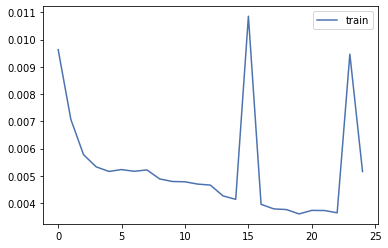

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_94"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_188 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_189 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_94 (Dense)             (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0083
Epoch 2/25
479/479 - 8s - loss: 0.0058
Epoch 3/25
479/479 - 8s - loss: 0.0055
Epoch 4/25
479/479 - 8s - loss: 0.0049
Epoch 5/25
479/479 - 8s - loss: 0.0054
Epoch 6/25
479/479 - 8s - loss: 0.0047
Epoch 7/25
479/479 - 8s - loss: 0.0045
Epoch 8/25
479/4

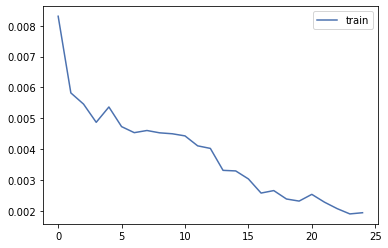

In [96]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
#NAME = ['LIN','SHW','APD','ECL','FCX','NEM','DD','PPG','IFF','BLL']

NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-100)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L:L+100,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[:L,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L:L+100,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=150))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [97]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred2 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred2['NEE'].pct_change()
DUK_daily_returns = TEST_pred2['DUK'].pct_change()

SO_daily_returns = TEST_pred2['SO'].pct_change()
D_daily_returns = TEST_pred2['D'].pct_change()

EXC_daily_returns = TEST_pred2['EXC'].pct_change()
AEP_daily_returns = TEST_pred2['AEP'].pct_change()

SRE_daily_returns = TEST_pred2['SRE'].pct_change()
XEL_daily_returns = TEST_pred2['XEL'].pct_change()

PEG_daily_returns = TEST_pred2['PEG'].pct_change()
WEC_daily_returns = TEST_pred2['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred2 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred2 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred2 = TESTDailyReturn_pred2
atx_comps_rets_cumprod_pred2 = TESTCUM_pred2

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred2, x=atx_comps_rets_cumprod_pred2.index, y=atx_comps_rets_cumprod_pred2.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred2, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred2, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred2 = EfficientFrontier(mu, Sigma)
    ef_pred2.efficient_return(i)
    vol_ef.append(ef_pred2.portfolio_performance()[1])

ef_pred2 = EfficientFrontier(mu, Sigma)
ef_pred2.min_volatility()
min_vol_ret = ef_pred2.portfolio_performance()[0]
min_vol_vol = ef_pred2.portfolio_performance()[1]

ef_pred2.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred2.portfolio_performance()[0]
max_sharpe_vol = ef_pred2.portfolio_performance()[1]


portfolioREAL_Pred2 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)


Expected annual return: 10.1%
Annual volatility: 3.7%
Sharpe Ratio: 2.49


(0.10114731087101345, 0.03705903980244647, 2.4865002267255263)

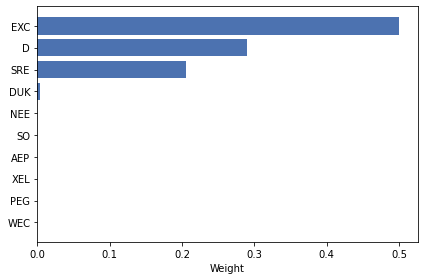

In [98]:

ef_pred2 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred2 = ef_pred2.min_volatility()

plot_weights(raw_weights_minvar_exp_pred2)
ef_pred2.portfolio_performance(verbose = True, risk_free_rate = 0.009)




Expected annual return: 21.9%
Annual volatility: 6.0%
Sharpe Ratio: 3.51


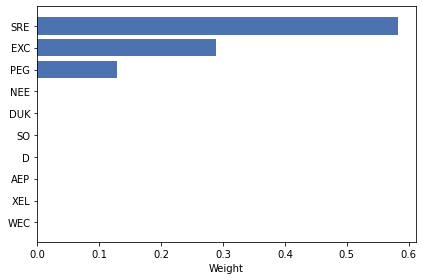

In [99]:
ef_pred2 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred2.max_sharpe(risk_free_rate=0.009)
Weight_Pred2  = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred2,AV1_Pred2,SR1_Pred2=ef_pred2.portfolio_performance(verbose = True, risk_free_rate = 0.009)


In [100]:
Weight_Pred2= raw_weights_maxsharpe_exp.values()

LISTValue_Pred2= list(Weight_Pred2)

SUMpredict_Pred2 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred2))*np.mat(np.array(SUMpredict_Pred2))

per_Pred2 = pd.DataFrame(hhhhh.T,columns = ['per_Pred2'])



In [101]:
PortfolioREAL_Daily_Return_Pred2 = portfolioREAL_Pred2.pct_change()

PortfolioREAL_cum_returns_Pred2 = (PortfolioREAL_Daily_Return_Pred2 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred2))*(np.mat(np.array(LISTValue_Pred2)).T)

perreal_Pred2 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred2'])


# period 2

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_105"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_210 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_211 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_105 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0043
Epoch 2/25
479/479 - 9s - loss: 0.0028
Epoch 3/25
479/479 - 9s - loss: 0.0028
Epoch 4/25
479/479 - 8s - loss: 0.0027
Epoch 5/25
479/479 - 8s - loss: 0.0024
Epoch 6/25
479/479 - 8s - loss: 0.0025
Epoch 7/25
479/479 - 8s - loss: 0.0025
Epoch 8/25
479/

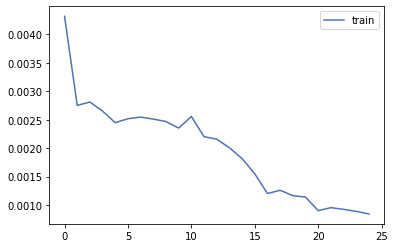

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_106"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_212 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_213 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_106 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0128
Epoch 2/25
479/479 - 8s - loss: 0.0097
Epoch 3/25
479/479 - 9s - loss: 0.0091
Epoch 4/25
479/479 - 8s - loss: 0.0091
Epoch 5/25
479/479 - 8s - loss: 0.0087
Epoch 6/25
479/479 - 8s - loss: 0.0081
Epoch 7/25
479/479 - 9s - loss: 0.0082
Epoch 8/25
479/

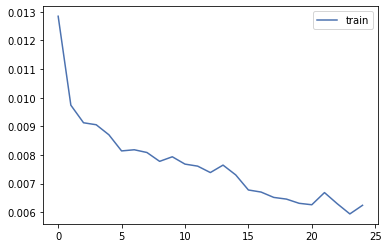

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_107"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_214 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_215 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_107 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 12s - loss: 0.0196
Epoch 2/25
479/479 - 8s - loss: 0.0136
Epoch 3/25
479/479 - 8s - loss: 0.0136
Epoch 4/25
479/479 - 8s - loss: 0.0129
Epoch 5/25
479/479 - 9s - loss: 0.0127
Epoch 6/25
479/479 - 8s - loss: 0.0121
Epoch 7/25
479/479 - 8s - loss: 0.0117
Epoch 8/25
479/4

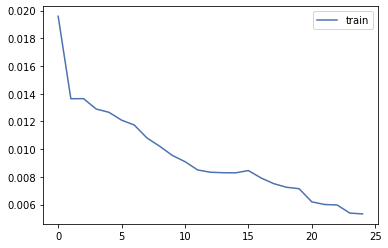

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_108"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_216 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_217 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_108 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0096
Epoch 2/25
479/479 - 8s - loss: 0.0049
Epoch 3/25
479/479 - 8s - loss: 0.0046
Epoch 4/25
479/479 - 8s - loss: 0.0043
Epoch 5/25
479/479 - 8s - loss: 0.0042
Epoch 6/25
479/479 - 8s - loss: 0.0041
Epoch 7/25
479/479 - 8s - loss: 0.0041
Epoch 8/25
479/47

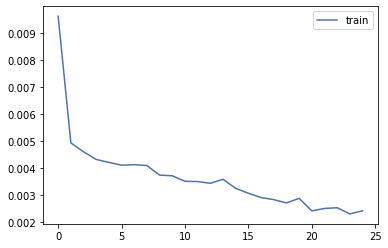

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_109"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_218 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_219 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_109 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0244
Epoch 2/25
479/479 - 8s - loss: 0.0116
Epoch 3/25
479/479 - 8s - loss: 0.0107
Epoch 4/25
479/479 - 8s - loss: 0.0107
Epoch 5/25
479/479 - 8s - loss: 0.0097
Epoch 6/25
479/479 - 8s - loss: 0.0096
Epoch 7/25
479/479 - 9s - loss: 0.0096
Epoch 8/25
479/

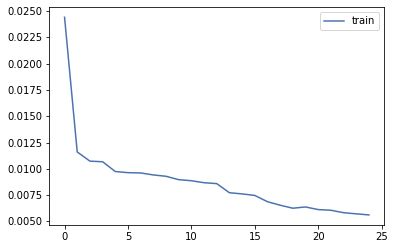

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_110"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_220 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_221 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_110 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 12s - loss: 0.0083
Epoch 2/25
479/479 - 8s - loss: 0.0061
Epoch 3/25
479/479 - 9s - loss: 0.0057
Epoch 4/25
479/479 - 8s - loss: 0.0054
Epoch 5/25
479/479 - 9s - loss: 0.0052
Epoch 6/25
479/479 - 8s - loss: 0.0051
Epoch 7/25
479/479 - 8s - loss: 0.0050
Epoch 8/25
479/

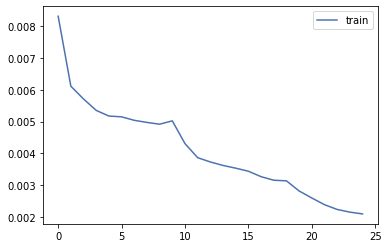

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_111"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_222 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_223 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_111 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0105
Epoch 2/25
479/479 - 8s - loss: 0.0054
Epoch 3/25
479/479 - 8s - loss: 0.0053
Epoch 4/25
479/479 - 9s - loss: 0.0047
Epoch 5/25
479/479 - 8s - loss: 0.0049
Epoch 6/25
479/479 - 8s - loss: 0.0048
Epoch 7/25
479/479 - 9s - loss: 0.0050
Epoch 8/25
479/

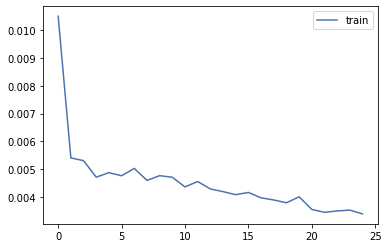

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_112"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_224 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_225 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_112 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0079
Epoch 2/25
479/479 - 8s - loss: 0.0054
Epoch 3/25
479/479 - 8s - loss: 0.0053
Epoch 4/25
479/479 - 8s - loss: 0.0044
Epoch 5/25
479/479 - 8s - loss: 0.0046
Epoch 6/25
479/479 - 8s - loss: 0.0045
Epoch 7/25
479/479 - 8s - loss: 0.0044
Epoch 8/25
479/

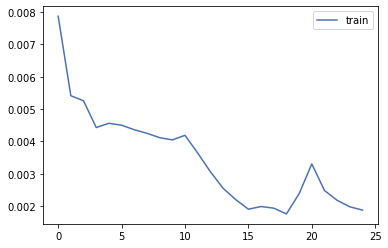

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_113"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_226 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_227 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_113 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0069
Epoch 2/25
479/479 - 8s - loss: 0.0052
Epoch 3/25
479/479 - 9s - loss: 0.0042
Epoch 4/25
479/479 - 8s - loss: 0.0041
Epoch 5/25
479/479 - 8s - loss: 0.0042
Epoch 6/25
479/479 - 8s - loss: 0.0040
Epoch 7/25
479/479 - 8s - loss: 0.0041
Epoch 8/25
479/

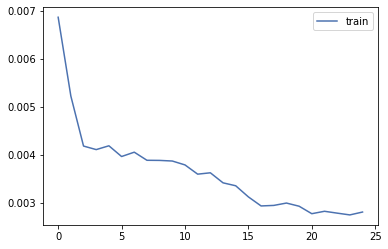

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_114"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_228 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_229 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_114 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0068
Epoch 2/25
479/479 - 8s - loss: 0.0052
Epoch 3/25
479/479 - 8s - loss: 0.0048
Epoch 4/25
479/479 - 11s - loss: 0.0045
Epoch 5/25
479/479 - 9s - loss: 0.0043
Epoch 6/25
479/479 - 9s - loss: 0.0045
Epoch 7/25
479/479 - 9s - loss: 0.0044
Epoch 8/25
479

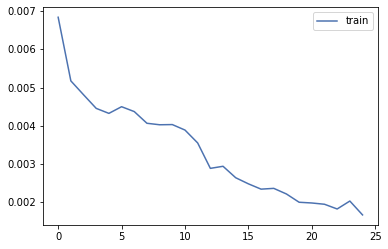

In [104]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
#NAME = ['LIN','SHW','APD','ECL','FCX','NEM','DD','PPG','IFF','BLL']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-100)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+100:L+200,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[100:L+100,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+100:L+200,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=150))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [105]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred3 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred3['NEE'].pct_change()
DUK_daily_returns = TEST_pred3['DUK'].pct_change()

SO_daily_returns = TEST_pred3['SO'].pct_change()
D_daily_returns = TEST_pred3['D'].pct_change()

EXC_daily_returns = TEST_pred3['EXC'].pct_change()
AEP_daily_returns = TEST_pred3['AEP'].pct_change()

SRE_daily_returns = TEST_pred3['SRE'].pct_change()
XEL_daily_returns = TEST_pred3['XEL'].pct_change()

PEG_daily_returns = TEST_pred3['PEG'].pct_change()
WEC_daily_returns = TEST_pred3['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred3 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred3 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred3 = TESTDailyReturn_pred3
atx_comps_rets_cumprod_pred3 = TESTCUM_pred3

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred3, x=atx_comps_rets_cumprod_pred3.index, y=atx_comps_rets_cumprod_pred3.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred3, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred3, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred3 = EfficientFrontier(mu, Sigma)
    ef_pred3.efficient_return(i)
    vol_ef.append(ef_pred3.portfolio_performance()[1])

ef_pred3 = EfficientFrontier(mu, Sigma)
ef_pred3.min_volatility()
min_vol_ret = ef_pred3.portfolio_performance()[0]
min_vol_vol = ef_pred3.portfolio_performance()[1]

ef_pred3.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred3.portfolio_performance()[0]
max_sharpe_vol = ef_pred3.portfolio_performance()[1]


portfolioREAL_Pred3 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)




Expected annual return: -2.2%
Annual volatility: 2.1%
Sharpe Ratio: -1.48


(-0.0224533657616676, 0.0212346097567128, -1.4812311656315884)

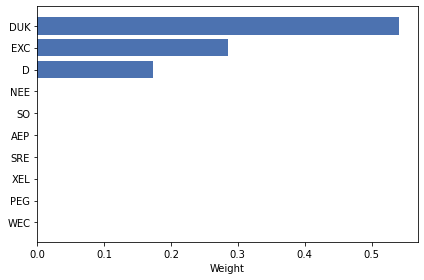

In [106]:

ef_pred3 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred3 = ef_pred3.min_volatility()

plot_weights(raw_weights_minvar_exp_pred3)
ef_pred3.portfolio_performance(verbose = True, risk_free_rate = 0.009)



Expected annual return: 3.7%
Annual volatility: 4.6%
Sharpe Ratio: 0.62


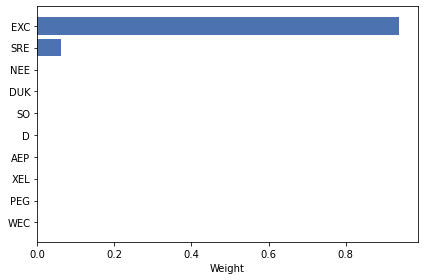

In [107]:


ef_pred3 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred3.max_sharpe(risk_free_rate=0.009)
Weight_Pred3  = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred3,AV1_Pred3,SR1_Pred3=ef_pred3.portfolio_performance(verbose = True, risk_free_rate = 0.009)



In [108]:


Weight_Pred3= raw_weights_maxsharpe_exp.values()

LISTValue_Pred3= list(Weight_Pred3)

SUMpredict_Pred3 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred3))*np.mat(np.array(SUMpredict_Pred3))

per_Pred3 = pd.DataFrame(hhhhh.T,columns = ['per_Pred3'])



PortfolioREAL_Daily_Return_Pred3 = portfolioREAL_Pred3.pct_change()

PortfolioREAL_cum_returns_Pred3 = (PortfolioREAL_Daily_Return_Pred3 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred3))*(np.mat(np.array(LISTValue_Pred3)).T)

perreal_Pred3 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred3'])

# period 3

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_115"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_230 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_231 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_115 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 12s - loss: 0.0051
Epoch 2/25
479/479 - 9s - loss: 0.0032
Epoch 3/25
479/479 - 9s - loss: 0.0028
Epoch 4/25
479/479 - 9s - loss: 0.0024
Epoch 5/25
479/479 - 8s - loss: 0.0022
Epoch 6/25
479/479 - 8s - loss: 0.0025
Epoch 7/25
479/479 - 8s - loss: 0.0026
Epoch 8/25
479/

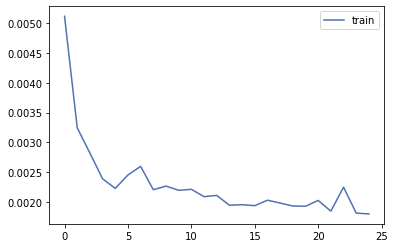

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_116"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_232 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_233 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_116 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0136
Epoch 2/25
479/479 - 8s - loss: 0.0102
Epoch 3/25
479/479 - 9s - loss: 0.0103
Epoch 4/25
479/479 - 9s - loss: 0.0100
Epoch 5/25
479/479 - 8s - loss: 0.0101
Epoch 6/25
479/479 - 8s - loss: 0.0094
Epoch 7/25
479/479 - 8s - loss: 0.0097
Epoch 8/25
479/

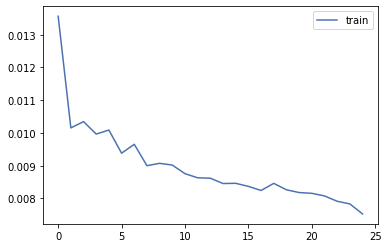

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_117"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_234 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_235 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_117 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0169
Epoch 2/25
479/479 - 9s - loss: 0.0138
Epoch 3/25
479/479 - 8s - loss: 0.0134
Epoch 4/25
479/479 - 8s - loss: 0.0133
Epoch 5/25
479/479 - 9s - loss: 0.0128
Epoch 6/25
479/479 - 8s - loss: 0.0127
Epoch 7/25
479/479 - 8s - loss: 0.0126
Epoch 8/25
479/4

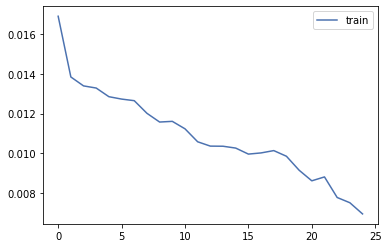

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_118"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_236 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_237 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_118 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 12s - loss: 0.0101
Epoch 2/25
479/479 - 9s - loss: 0.0058
Epoch 3/25
479/479 - 9s - loss: 0.0059
Epoch 4/25
479/479 - 8s - loss: 0.0053
Epoch 5/25
479/479 - 9s - loss: 0.0051
Epoch 6/25
479/479 - 9s - loss: 0.0051
Epoch 7/25
479/479 - 9s - loss: 0.0048
Epoch 8/25
479/47

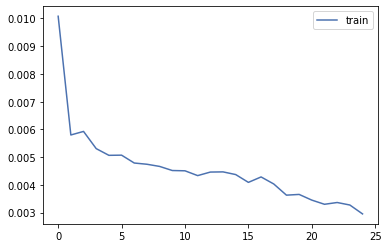

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_119"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_238 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_239 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_119 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0206
Epoch 2/25
479/479 - 8s - loss: 0.0134
Epoch 3/25
479/479 - 9s - loss: 0.0108
Epoch 4/25
479/479 - 8s - loss: 0.0108
Epoch 5/25
479/479 - 8s - loss: 0.0105
Epoch 6/25
479/479 - 8s - loss: 0.0103
Epoch 7/25
479/479 - 8s - loss: 0.0098
Epoch 8/25
479/

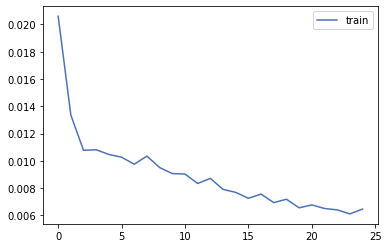

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_120"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_240 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_241 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_120 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0079
Epoch 2/25
479/479 - 8s - loss: 0.0062
Epoch 3/25
479/479 - 9s - loss: 0.0060
Epoch 4/25
479/479 - 9s - loss: 0.0056
Epoch 5/25
479/479 - 8s - loss: 0.0056
Epoch 6/25
479/479 - 9s - loss: 0.0054
Epoch 7/25
479/479 - 9s - loss: 0.0055
Epoch 8/25
479/

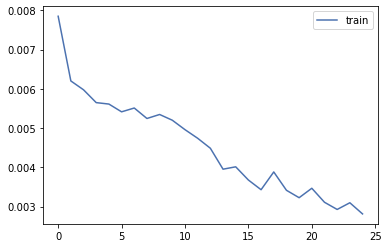

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_121"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_242 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_243 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_121 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0089
Epoch 2/25
479/479 - 8s - loss: 0.0054
Epoch 3/25
479/479 - 9s - loss: 0.0049
Epoch 4/25
479/479 - 8s - loss: 0.0047
Epoch 5/25
479/479 - 9s - loss: 0.0045
Epoch 6/25
479/479 - 9s - loss: 0.0046
Epoch 7/25
479/479 - 8s - loss: 0.0045
Epoch 8/25
479/

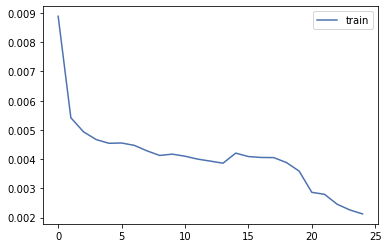

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_122"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_244 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_245 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_122 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 12s - loss: 0.0078
Epoch 2/25
479/479 - 8s - loss: 0.0065
Epoch 3/25
479/479 - 8s - loss: 0.0059
Epoch 4/25
479/479 - 8s - loss: 0.0053
Epoch 5/25
479/479 - 9s - loss: 0.0050
Epoch 6/25
479/479 - 8s - loss: 0.0053
Epoch 7/25
479/479 - 9s - loss: 0.0053
Epoch 8/25
479/

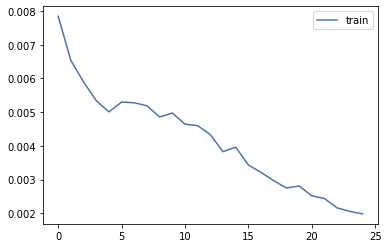

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_123"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_246 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_247 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_123 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0080
Epoch 2/25
479/479 - 8s - loss: 0.0062
Epoch 3/25
479/479 - 10s - loss: 0.0062
Epoch 4/25
479/479 - 9s - loss: 0.0053
Epoch 5/25
479/479 - 9s - loss: 0.0058
Epoch 6/25
479/479 - 9s - loss: 0.0050
Epoch 7/25
479/479 - 9s - loss: 0.0048
Epoch 8/25
479

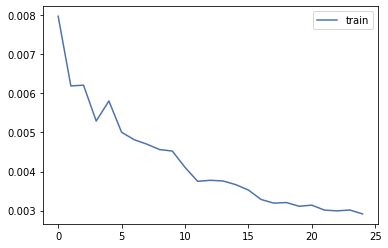

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_124"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_248 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_249 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_124 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 13s - loss: 0.0068
Epoch 2/25
479/479 - 8s - loss: 0.0057
Epoch 3/25
479/479 - 8s - loss: 0.0053
Epoch 4/25
479/479 - 8s - loss: 0.0047
Epoch 5/25
479/479 - 8s - loss: 0.0047
Epoch 6/25
479/479 - 8s - loss: 0.0045
Epoch 7/25
479/479 - 9s - loss: 0.0046
Epoch 8/25
479/

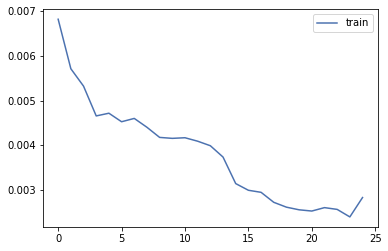

In [109]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-100)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+200:L+300,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[200:L+200,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+200:L+300,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=150))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [110]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred4 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred4['NEE'].pct_change()
DUK_daily_returns = TEST_pred4['DUK'].pct_change()

SO_daily_returns = TEST_pred4['SO'].pct_change()
D_daily_returns = TEST_pred4['D'].pct_change()

EXC_daily_returns = TEST_pred4['EXC'].pct_change()
AEP_daily_returns = TEST_pred4['AEP'].pct_change()

SRE_daily_returns = TEST_pred4['SRE'].pct_change()
XEL_daily_returns = TEST_pred4['XEL'].pct_change()

PEG_daily_returns = TEST_pred4['PEG'].pct_change()
WEC_daily_returns = TEST_pred4['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred4 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred4 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred4 = TESTDailyReturn_pred4
atx_comps_rets_cumprod_pred4 = TESTCUM_pred4

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred4, x=atx_comps_rets_cumprod_pred4.index, y=atx_comps_rets_cumprod_pred4.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred4, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred4, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred4 = EfficientFrontier(mu, Sigma)
    ef_pred4.efficient_return(i)
    vol_ef.append(ef_pred4.portfolio_performance()[1])

ef_pred4 = EfficientFrontier(mu, Sigma)
ef_pred4.min_volatility()
min_vol_ret = ef_pred4.portfolio_performance()[0]
min_vol_vol = ef_pred4.portfolio_performance()[1]

ef_pred4.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred4.portfolio_performance()[0]
max_sharpe_vol = ef_pred4.portfolio_performance()[1]


portfolioREAL_Pred4 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)












Expected annual return: 13.7%
Annual volatility: 5.2%
Sharpe Ratio: 2.43


(0.13653963677519898, 0.052473163903752375, 2.4305688334161717)

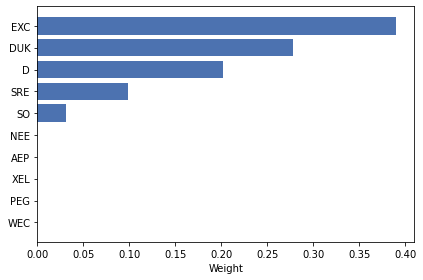

In [111]:

ef_pred4 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred4 = ef_pred4.min_volatility()

plot_weights(raw_weights_minvar_exp_pred4)
ef_pred4.portfolio_performance(verbose = True, risk_free_rate = 0.009)


Expected annual return: 24.4%
Annual volatility: 7.0%
Sharpe Ratio: 3.35


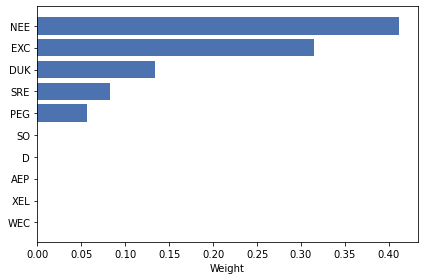

In [112]:

ef_pred4 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred4.max_sharpe(risk_free_rate=0.009)
Weight_Pred4  = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred4,AV1_Pred4,SR1_Pred4=ef_pred4.portfolio_performance(verbose = True, risk_free_rate = 0.009)



In [113]:

Weight_Pred4= raw_weights_maxsharpe_exp.values()

LISTValue_Pred4= list(Weight_Pred4)

SUMpredict_Pred4 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred4))*np.mat(np.array(SUMpredict_Pred4))

per_Pred4 = pd.DataFrame(hhhhh.T,columns = ['per_Pred4'])



PortfolioREAL_Daily_Return_Pred4 = portfolioREAL_Pred4.pct_change()

PortfolioREAL_cum_returns_Pred4 = (PortfolioREAL_Daily_Return_Pred4 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred4))*(np.mat(np.array(LISTValue_Pred4)).T)

perreal_Pred4 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred4'])

# period 4

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_125"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_250 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_251 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_125 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0048
Epoch 2/25
479/479 - 8s - loss: 0.0033
Epoch 3/25
479/479 - 8s - loss: 0.0027
Epoch 4/25
479/479 - 8s - loss: 0.0020
Epoch 5/25
479/479 - 8s - loss: 0.0019
Epoch 6/25
479/479 - 8s - loss: 0.0019
Epoch 7/25
479/479 - 8s - loss: 0.0020
Epoch 8/25
479/

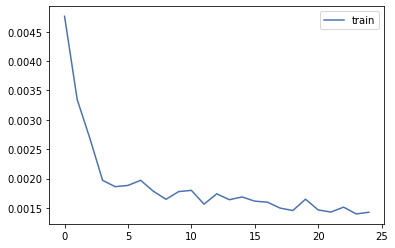

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_126"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_252 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_253 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_126 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0122
Epoch 2/25
479/479 - 9s - loss: 0.0094
Epoch 3/25
479/479 - 9s - loss: 0.0094
Epoch 4/25
479/479 - 9s - loss: 0.0090
Epoch 5/25
479/479 - 9s - loss: 0.0088
Epoch 6/25
479/479 - 9s - loss: 0.0086
Epoch 7/25
479/479 - 9s - loss: 0.0085
Epoch 8/25
479/

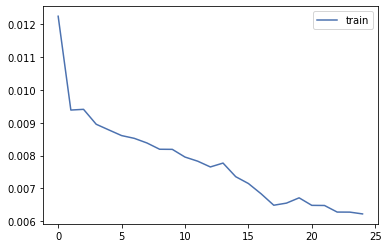

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_127"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_254 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_255 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_127 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0162
Epoch 2/25
479/479 - 9s - loss: 0.0145
Epoch 3/25
479/479 - 9s - loss: 0.0145
Epoch 4/25
479/479 - 10s - loss: 0.0135
Epoch 5/25
479/479 - 10s - loss: 0.0137
Epoch 6/25
479/479 - 9s - loss: 0.0137
Epoch 7/25
479/479 - 8s - loss: 0.0129
Epoch 8/25
479

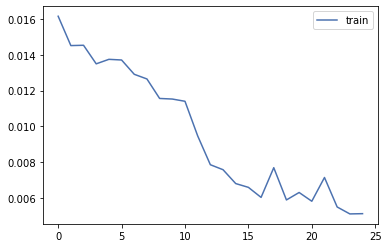

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_256 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_257 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_128 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0103
Epoch 2/25
479/479 - 9s - loss: 0.0070
Epoch 3/25
479/479 - 9s - loss: 0.0066
Epoch 4/25
479/479 - 9s - loss: 0.0066
Epoch 5/25
479/479 - 9s - loss: 0.0067
Epoch 6/25
479/479 - 8s - loss: 0.0063
Epoch 7/25
479/479 - 9s - loss: 0.0062
Epoch 8/25
479/47

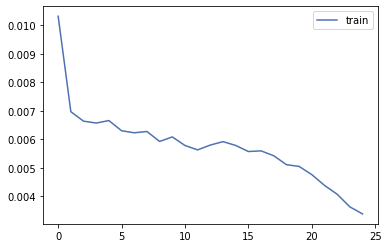

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_129"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_258 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_259 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_129 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 12s - loss: 0.0211
Epoch 2/25
479/479 - 9s - loss: 0.0126
Epoch 3/25
479/479 - 9s - loss: 0.0117
Epoch 4/25
479/479 - 8s - loss: 0.0107
Epoch 5/25
479/479 - 8s - loss: 0.0108
Epoch 6/25
479/479 - 8s - loss: 0.0105
Epoch 7/25
479/479 - 8s - loss: 0.0117
Epoch 8/25
479/

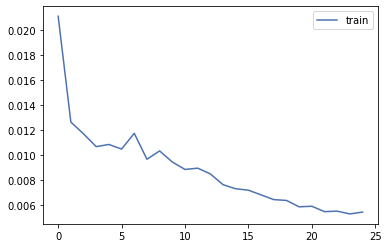

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_130"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_260 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_261 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_130 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0080
Epoch 2/25
479/479 - 9s - loss: 0.0062
Epoch 3/25
479/479 - 9s - loss: 0.0060
Epoch 4/25
479/479 - 9s - loss: 0.0057
Epoch 5/25
479/479 - 9s - loss: 0.0054
Epoch 6/25
479/479 - 9s - loss: 0.0052
Epoch 7/25
479/479 - 8s - loss: 0.0050
Epoch 8/25
479/

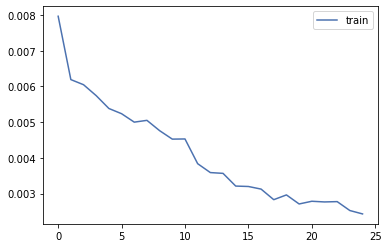

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_131"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_262 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_263 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_131 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 12s - loss: 0.0091
Epoch 2/25
479/479 - 9s - loss: 0.0065
Epoch 3/25
479/479 - 9s - loss: 0.0060
Epoch 4/25
479/479 - 9s - loss: 0.0057
Epoch 5/25
479/479 - 9s - loss: 0.0056
Epoch 6/25
479/479 - 8s - loss: 0.0056
Epoch 7/25
479/479 - 8s - loss: 0.0054
Epoch 8/25
479/

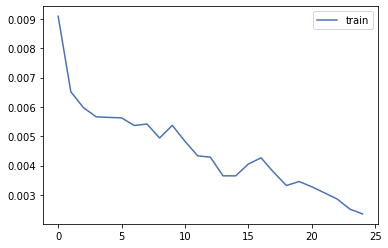

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_132"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_264 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_265 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_132 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0085
Epoch 2/25
479/479 - 8s - loss: 0.0069
Epoch 3/25
479/479 - 8s - loss: 0.0054
Epoch 4/25
479/479 - 8s - loss: 0.0050
Epoch 5/25
479/479 - 8s - loss: 0.0052
Epoch 6/25
479/479 - 8s - loss: 0.0052
Epoch 7/25
479/479 - 8s - loss: 0.0050
Epoch 8/25
479/

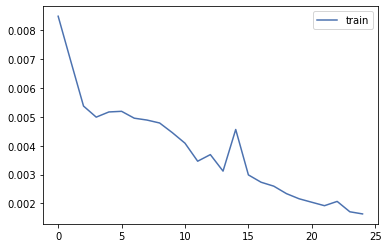

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_133"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_266 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_267 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_133 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0073
Epoch 2/25
479/479 - 9s - loss: 0.0064
Epoch 3/25
479/479 - 8s - loss: 0.0054
Epoch 4/25
479/479 - 8s - loss: 0.0053
Epoch 5/25
479/479 - 8s - loss: 0.0047
Epoch 6/25
479/479 - 8s - loss: 0.0046
Epoch 7/25
479/479 - 8s - loss: 0.0042
Epoch 8/25
479/

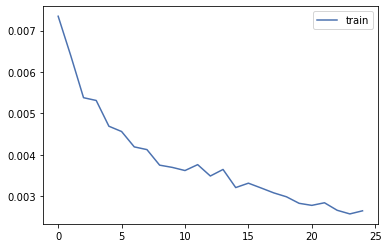

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_134"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_268 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_269 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_134 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0080
Epoch 2/25
479/479 - 9s - loss: 0.0058
Epoch 3/25
479/479 - 9s - loss: 0.0047
Epoch 4/25
479/479 - 9s - loss: 0.0043
Epoch 5/25
479/479 - 9s - loss: 0.0045
Epoch 6/25
479/479 - 8s - loss: 0.0042
Epoch 7/25
479/479 - 9s - loss: 0.0038
Epoch 8/25
479/

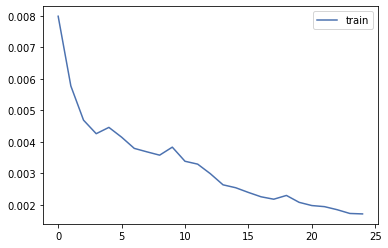

In [114]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-100)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+300:,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[300:L+300,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+300:L+400,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=150))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [115]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred5 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred5['NEE'].pct_change()
DUK_daily_returns = TEST_pred5['DUK'].pct_change()

SO_daily_returns = TEST_pred5['SO'].pct_change()
D_daily_returns = TEST_pred5['D'].pct_change()

EXC_daily_returns = TEST_pred5['EXC'].pct_change()
AEP_daily_returns = TEST_pred5['AEP'].pct_change()

SRE_daily_returns = TEST_pred5['SRE'].pct_change()
XEL_daily_returns = TEST_pred5['XEL'].pct_change()

PEG_daily_returns = TEST_pred5['PEG'].pct_change()
WEC_daily_returns = TEST_pred5['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred5 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred5 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred5 = TESTDailyReturn_pred5
atx_comps_rets_cumprod_pred5 = TESTCUM_pred5

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred5, x=atx_comps_rets_cumprod_pred5.index, y=atx_comps_rets_cumprod_pred5.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred5, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred5, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred5 = EfficientFrontier(mu, Sigma)
    ef_pred5.efficient_return(i)
    vol_ef.append(ef_pred5.portfolio_performance()[1])

ef_pred5 = EfficientFrontier(mu, Sigma)
ef_pred5.min_volatility()
min_vol_ret = ef_pred5.portfolio_performance()[0]
min_vol_vol = ef_pred5.portfolio_performance()[1]

ef_pred5.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred5.portfolio_performance()[0]
max_sharpe_vol = ef_pred5.portfolio_performance()[1]


portfolioREAL_Pred5 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)



Expected annual return: 56.9%
Annual volatility: 24.6%
Sharpe Ratio: 2.27


(0.5688719725209893, 0.24636406352864237, 2.2725391215829593)

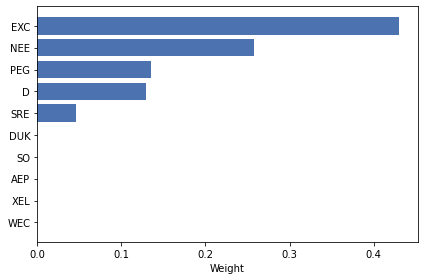

In [116]:

ef_pred5 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred5 = ef_pred5.min_volatility()

plot_weights(raw_weights_minvar_exp_pred5)
ef_pred5.portfolio_performance(verbose = True, risk_free_rate = 0.009)

Expected annual return: 137.2%
Annual volatility: 36.1%
Sharpe Ratio: 3.77


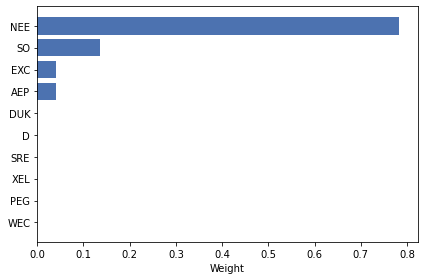

In [117]:

ef_pred5 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred5.max_sharpe(risk_free_rate=0.009)
Weight_Pred5 = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred5,AV1_Pred5,SR1_Pred5=ef_pred5.portfolio_performance(verbose = True, risk_free_rate = 0.009)

In [118]:


Weight_Pred5= raw_weights_maxsharpe_exp.values()

LISTValue_Pred5= list(Weight_Pred5)

SUMpredict_Pred5 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred5))*np.mat(np.array(SUMpredict_Pred5))

per_Pred5 = pd.DataFrame(hhhhh.T,columns = ['per_Pred5'])



PortfolioREAL_Daily_Return_Pred5 = portfolioREAL_Pred5.pct_change()

PortfolioREAL_cum_returns_Pred5 = (PortfolioREAL_Daily_Return_Pred5 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred5))*(np.mat(np.array(LISTValue_Pred5)).T)

perreal_Pred5 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred5'])


# period 5

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_135"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_270 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_271 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_135 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0052
Epoch 2/25
479/479 - 9s - loss: 0.0036
Epoch 3/25
479/479 - 9s - loss: 0.0024
Epoch 4/25
479/479 - 9s - loss: 0.0021
Epoch 5/25
479/479 - 9s - loss: 0.0017
Epoch 6/25
479/479 - 9s - loss: 0.0017
Epoch 7/25
479/479 - 9s - loss: 0.0017
Epoch 8/25
479/

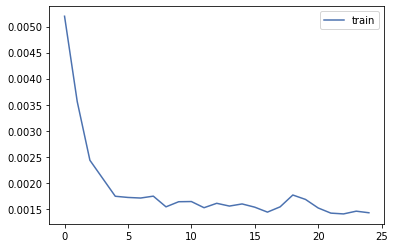

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_136"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_272 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_273 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_136 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0126
Epoch 2/25
479/479 - 8s - loss: 0.0097
Epoch 3/25
479/479 - 9s - loss: 0.0093
Epoch 4/25
479/479 - 10s - loss: 0.0094
Epoch 5/25
479/479 - 9s - loss: 0.0093
Epoch 6/25
479/479 - 9s - loss: 0.0092
Epoch 7/25
479/479 - 9s - loss: 0.0096
Epoch 8/25
479

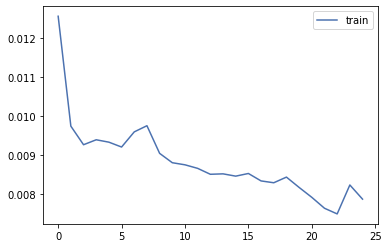

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_137"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_274 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_275 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_137 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0165
Epoch 2/25
479/479 - 8s - loss: 0.0156
Epoch 3/25
479/479 - 9s - loss: 0.0140
Epoch 4/25
479/479 - 8s - loss: 0.0129
Epoch 5/25
479/479 - 8s - loss: 0.0132
Epoch 6/25
479/479 - 8s - loss: 0.0129
Epoch 7/25
479/479 - 9s - loss: 0.0132
Epoch 8/25
479/4

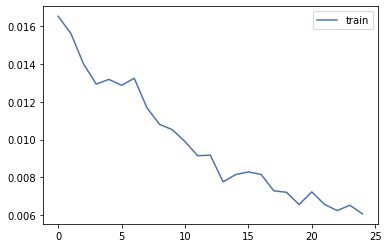

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_138"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_276 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_277 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_138 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 12s - loss: 0.0105
Epoch 2/25
479/479 - 9s - loss: 0.0078
Epoch 3/25
479/479 - 9s - loss: 0.0072
Epoch 4/25
479/479 - 9s - loss: 0.0070
Epoch 5/25
479/479 - 10s - loss: 0.0067
Epoch 6/25
479/479 - 9s - loss: 0.0068
Epoch 7/25
479/479 - 9s - loss: 0.0067
Epoch 8/25
479/4

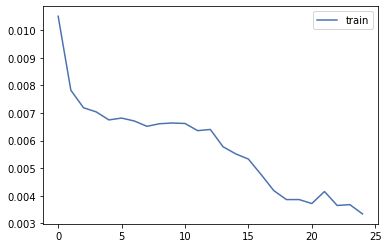

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_139"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_278 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_279 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_139 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 12s - loss: 0.0259
Epoch 2/25
479/479 - 9s - loss: 0.0166
Epoch 3/25
479/479 - 9s - loss: 0.0143
Epoch 4/25
479/479 - 9s - loss: 0.0138
Epoch 5/25
479/479 - 9s - loss: 0.0141
Epoch 6/25
479/479 - 9s - loss: 0.0128
Epoch 7/25
479/479 - 9s - loss: 0.0123
Epoch 8/25
479/

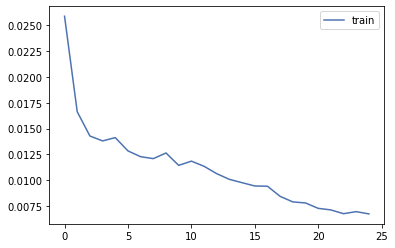

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_140"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_280 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_281 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_140 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0081
Epoch 2/25
479/479 - 9s - loss: 0.0065
Epoch 3/25
479/479 - 9s - loss: 0.0063
Epoch 4/25
479/479 - 9s - loss: 0.0055
Epoch 5/25
479/479 - 9s - loss: 0.0058
Epoch 6/25
479/479 - 9s - loss: 0.0053
Epoch 7/25
479/479 - 9s - loss: 0.0052
Epoch 8/25
479/

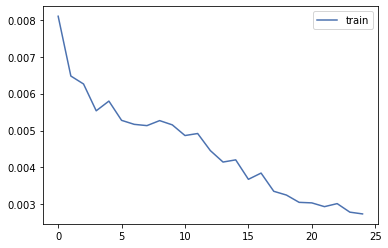

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_141"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_282 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_283 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_141 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 12s - loss: 0.0094
Epoch 2/25
479/479 - 8s - loss: 0.0067
Epoch 3/25
479/479 - 8s - loss: 0.0068
Epoch 4/25
479/479 - 10s - loss: 0.0064
Epoch 5/25
479/479 - 9s - loss: 0.0064
Epoch 6/25
479/479 - 8s - loss: 0.0062
Epoch 7/25
479/479 - 8s - loss: 0.0061
Epoch 8/25
479

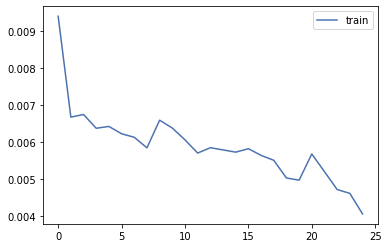

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_142"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_284 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_285 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_142 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0072
Epoch 2/25
479/479 - 8s - loss: 0.0052
Epoch 3/25
479/479 - 8s - loss: 0.0052
Epoch 4/25
479/479 - 8s - loss: 0.0046
Epoch 5/25
479/479 - 8s - loss: 0.0048
Epoch 6/25
479/479 - 8s - loss: 0.0044
Epoch 7/25
479/479 - 8s - loss: 0.0047
Epoch 8/25
479/

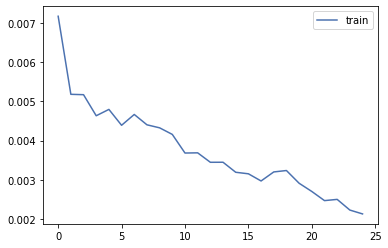

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_143"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_286 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_287 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_143 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0109
Epoch 2/25
479/479 - 8s - loss: 0.0098
Epoch 3/25
479/479 - 8s - loss: 0.0087
Epoch 4/25
479/479 - 8s - loss: 0.0083
Epoch 5/25
479/479 - 8s - loss: 0.0080
Epoch 6/25
479/479 - 8s - loss: 0.0083
Epoch 7/25
479/479 - 8s - loss: 0.0080
Epoch 8/25
479/

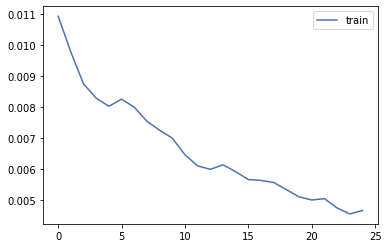

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_144"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_288 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_289 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_144 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0076
Epoch 2/25
479/479 - 8s - loss: 0.0052
Epoch 3/25
479/479 - 8s - loss: 0.0043
Epoch 4/25
479/479 - 8s - loss: 0.0042
Epoch 5/25
479/479 - 8s - loss: 0.0041
Epoch 6/25
479/479 - 8s - loss: 0.0040
Epoch 7/25
479/479 - 8s - loss: 0.0040
Epoch 8/25
479/

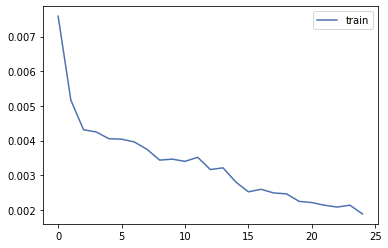

In [119]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-100)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+400:L+500,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[400:L+400,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+400:L+500,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=150))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [120]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred6 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred6['NEE'].pct_change()
DUK_daily_returns = TEST_pred6['DUK'].pct_change()

SO_daily_returns = TEST_pred6['SO'].pct_change()
D_daily_returns = TEST_pred6['D'].pct_change()

EXC_daily_returns = TEST_pred6['EXC'].pct_change()
AEP_daily_returns = TEST_pred6['AEP'].pct_change()

SRE_daily_returns = TEST_pred6['SRE'].pct_change()
XEL_daily_returns = TEST_pred6['XEL'].pct_change()

PEG_daily_returns = TEST_pred6['PEG'].pct_change()
WEC_daily_returns = TEST_pred6['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred6 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred6 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred6 = TESTDailyReturn_pred6
atx_comps_rets_cumprod_pred6 = TESTCUM_pred6

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred6, x=atx_comps_rets_cumprod_pred6.index, y=atx_comps_rets_cumprod_pred6.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred6, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred6, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred6 = EfficientFrontier(mu, Sigma)
    ef_pred6.efficient_return(i)
    vol_ef.append(ef_pred6.portfolio_performance()[1])

ef_pred6 = EfficientFrontier(mu, Sigma)
ef_pred6.min_volatility()
min_vol_ret = ef_pred6.portfolio_performance()[0]
min_vol_vol = ef_pred6.portfolio_performance()[1]

ef_pred6.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred6.portfolio_performance()[0]
max_sharpe_vol = ef_pred6.portfolio_performance()[1]


portfolioREAL_Pred6 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)

Expected annual return: -6.2%
Annual volatility: 5.4%
Sharpe Ratio: -1.31


(-0.06176154550916036, 0.053922894392421726, -1.312272761068722)

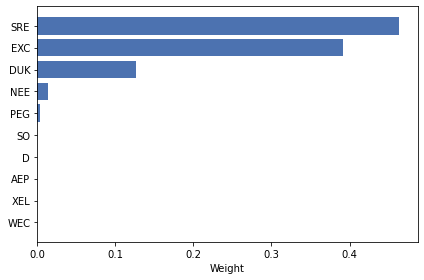

In [121]:

ef_pred6 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred6 = ef_pred6.min_volatility()

plot_weights(raw_weights_minvar_exp_pred6)
ef_pred6.portfolio_performance(verbose = True, risk_free_rate = 0.009)


Expected annual return: 68.2%
Annual volatility: 34.0%
Sharpe Ratio: 1.98


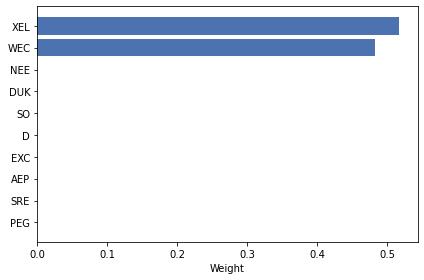

In [122]:

ef_pred6 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred6.max_sharpe(risk_free_rate=0.009)
Weight_Pred6  = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred6,AV1_Pred6,SR1_Pred6=ef_pred6.portfolio_performance(verbose = True, risk_free_rate = 0.009)

In [123]:

Weight_Pred6= raw_weights_maxsharpe_exp.values()

LISTValue_Pred6= list(Weight_Pred6)

SUMpredict_Pred6 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred6))*np.mat(np.array(SUMpredict_Pred6))

per_Pred6 = pd.DataFrame(hhhhh.T,columns = ['per_Pred6'])



PortfolioREAL_Daily_Return_Pred6 = portfolioREAL_Pred6.pct_change()

PortfolioREAL_cum_returns_Pred6 = (PortfolioREAL_Daily_Return_Pred6 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred6))*(np.mat(np.array(LISTValue_Pred6)).T)

perreal_Pred6 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred6'])

# period 6

StockNEE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_155"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_310 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_311 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_155 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 12s - loss: 0.0071
Epoch 2/25
479/479 - 9s - loss: 0.0032
Epoch 3/25
479/479 - 8s - loss: 0.0024
Epoch 4/25
479/479 - 8s - loss: 0.0019
Epoch 5/25
479/479 - 8s - loss: 0.0019
Epoch 6/25
479/479 - 8s - loss: 0.0017
Epoch 7/25
479/479 - 8s - loss: 0.0017
Epoch 8/25
479/

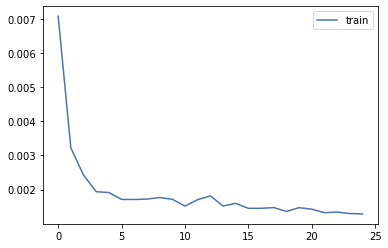

StockDUK
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_156"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_312 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_313 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_156 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0119
Epoch 2/25
479/479 - 8s - loss: 0.0103
Epoch 3/25
479/479 - 8s - loss: 0.0102
Epoch 4/25
479/479 - 8s - loss: 0.0100
Epoch 5/25
479/479 - 8s - loss: 0.0100
Epoch 6/25
479/479 - 8s - loss: 0.0099
Epoch 7/25
479/479 - 8s - loss: 0.0096
Epoch 8/25
479/

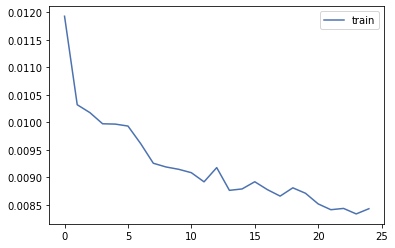

StockSO
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_157"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_314 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_315 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_157 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 13s - loss: 0.0166
Epoch 2/25
479/479 - 8s - loss: 0.0152
Epoch 3/25
479/479 - 8s - loss: 0.0142
Epoch 4/25
479/479 - 8s - loss: 0.0132
Epoch 5/25
479/479 - 8s - loss: 0.0128
Epoch 6/25
479/479 - 8s - loss: 0.0124
Epoch 7/25
479/479 - 8s - loss: 0.0120
Epoch 8/25
479/4

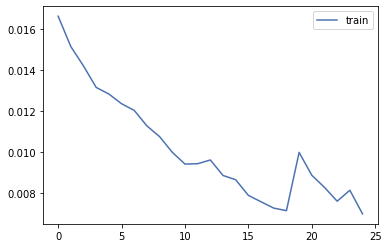

StockD
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_158"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_316 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_317 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_158 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0122
Epoch 2/25
479/479 - 8s - loss: 0.0088
Epoch 3/25
479/479 - 8s - loss: 0.0083
Epoch 4/25
479/479 - 8s - loss: 0.0083
Epoch 5/25
479/479 - 8s - loss: 0.0081
Epoch 6/25
479/479 - 8s - loss: 0.0077
Epoch 7/25
479/479 - 8s - loss: 0.0075
Epoch 8/25
479/47

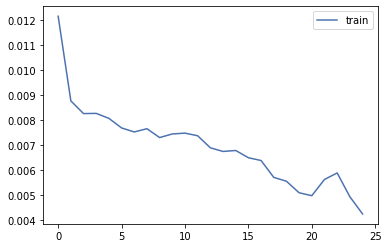

StockEXC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_159"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_318 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_319 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_159 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0296
Epoch 2/25
479/479 - 8s - loss: 0.0189
Epoch 3/25
479/479 - 8s - loss: 0.0164
Epoch 4/25
479/479 - 8s - loss: 0.0160
Epoch 5/25
479/479 - 8s - loss: 0.0148
Epoch 6/25
479/479 - 8s - loss: 0.0138
Epoch 7/25
479/479 - 8s - loss: 0.0136
Epoch 8/25
479/

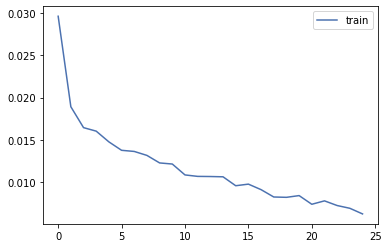

StockAEP
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_160"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_320 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_321 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_160 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 11s - loss: 0.0089
Epoch 2/25
479/479 - 8s - loss: 0.0073
Epoch 3/25
479/479 - 8s - loss: 0.0068
Epoch 4/25
479/479 - 8s - loss: 0.0061
Epoch 5/25
479/479 - 8s - loss: 0.0059
Epoch 6/25
479/479 - 8s - loss: 0.0062
Epoch 7/25
479/479 - 8s - loss: 0.0058
Epoch 8/25
479/

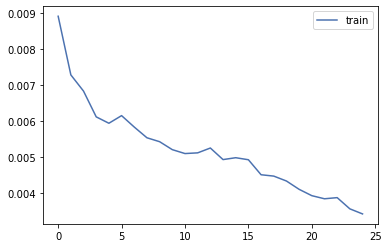

StockSRE
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_161"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_322 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_323 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_161 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0107
Epoch 2/25
479/479 - 10s - loss: 0.0071
Epoch 3/25
479/479 - 9s - loss: 0.0072
Epoch 4/25
479/479 - 8s - loss: 0.0069
Epoch 5/25
479/479 - 8s - loss: 0.0067
Epoch 6/25
479/479 - 8s - loss: 0.0066
Epoch 7/25
479/479 - 8s - loss: 0.0067
Epoch 8/25
479

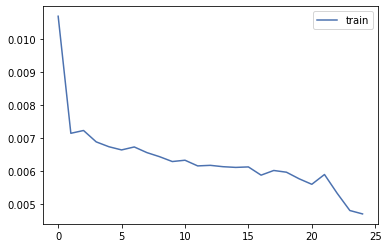

StockXEL
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_162"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_324 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_325 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_162 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0075
Epoch 2/25
479/479 - 8s - loss: 0.0057
Epoch 3/25
479/479 - 9s - loss: 0.0050
Epoch 4/25
479/479 - 9s - loss: 0.0051
Epoch 5/25
479/479 - 8s - loss: 0.0048
Epoch 6/25
479/479 - 9s - loss: 0.0045
Epoch 7/25
479/479 - 8s - loss: 0.0045
Epoch 8/25
479/

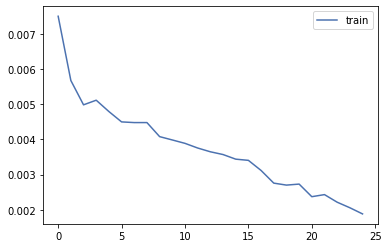

StockPEG
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_163"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_326 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_327 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_163 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0127
Epoch 2/25
479/479 - 8s - loss: 0.0109
Epoch 3/25
479/479 - 8s - loss: 0.0091
Epoch 4/25
479/479 - 8s - loss: 0.0080
Epoch 5/25
479/479 - 8s - loss: 0.0070
Epoch 6/25
479/479 - 8s - loss: 0.0069
Epoch 7/25
479/479 - 8s - loss: 0.0069
Epoch 8/25
479/

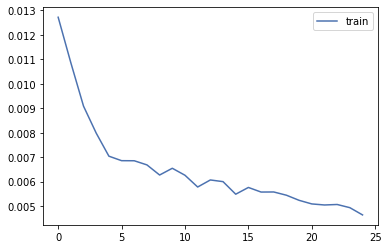

StockWEC
Preparing Lagged Features for Stock, Index Funds.....
Removing NAN rows -  21
Model: "sequential_164"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_328 (LSTM)              (None, 35, 150)           91200     
_________________________________________________________________
lstm_329 (LSTM)              (None, 150)               180600    
_________________________________________________________________
dense_164 (Dense)            (None, 1)                 151       
Total params: 271,951
Trainable params: 271,951
Non-trainable params: 0
_________________________________________________________________
Epoch 1/25
479/479 - 10s - loss: 0.0089
Epoch 2/25
479/479 - 8s - loss: 0.0053
Epoch 3/25
479/479 - 8s - loss: 0.0048
Epoch 4/25
479/479 - 8s - loss: 0.0043
Epoch 5/25
479/479 - 8s - loss: 0.0041
Epoch 6/25
479/479 - 8s - loss: 0.0039
Epoch 7/25
479/479 - 8s - loss: 0.0036
Epoch 8/25
479/

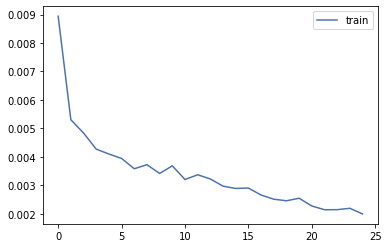

In [126]:
NAME = ['NEE','DUK','SO','D','EXC','AEP','SRE','XEL','PEG','WEC']
NUMBER = len(NAME)
for i in range(NUMBER):
    
    name='Stock'+str(NAME[i])
    print(name)
    locals()['Stock'+str(NAME[i])]=pd.read_csv(str(NAME[i])+'.csv')
    
    Name='df_Stock'+str(NAME[i])
    
    #best features
    features_selected = ['Open','High', 'Low','QQQ_Close', 'SnP_Close', 'DJIA_Close', 'Close']
    
    locals()['df_Stock'+str(NAME[i])] = locals()['Stock'+str(NAME[i])][features_selected]
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])]
    
    locals()['df_Stock'+str(NAME[i])]['Diff'] = locals()['df_Stock'+str(NAME[i])]['Close'] - locals()['df_Stock'+str(NAME[i])]['Open']
    locals()['df_Stock'+str(NAME[i])]['High-low'] = locals()['df_Stock'+str(NAME[i])]['High'] - locals()['df_Stock'+str(NAME[i])]['Low']    


    locals()['df_Stock'+str(NAME[i])] = prepare_lagged_features(locals()['df_Stock'+str(NAME[i])], lag_stock = 20, lag_index = 5)
    locals()['df_Stock'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])].drop(columns=['Open', 'High', 'Low','Diff','High-low'])

    
    locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close(t+7)'] = locals()['df_Stock'+str(NAME[i])].Close.shift(periods=-100)
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].dropna(axis=0,how='any')
    
    locals()['df_Stock'+str(NAME[i])] =locals()['df_Stock'+str(NAME[i])].rename(columns={'Close':str(NAME[i])+'Close'})
    Length = len(locals()['df_Stock'+str(NAME[i])])
    L = round(0.8*Length)
    
    locals()['close'+str(NAME[i])] = locals()['df_Stock'+str(NAME[i])][str(NAME[i])+'Close'].iloc[L+500:,]
   
    locals()['df_Stock'+str(NAME[i])]  = locals()['df_Stock'+str(NAME[i])] .drop(columns=[str(NAME[i])+'Close'])
    
    locals()['train'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[500:L+500,]
    locals()['test'+str(NAME[i])]=locals()['df_Stock'+str(NAME[i])].iloc[L+500:,]
    
    locals()['Y_train'+str(NAME[i])]= locals()['train'+str(NAME[i])][[str(NAME[i])+'Close(t+7)']]

    locals()['X_train'+str(NAME[i])] = locals()['train'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    
                                                                          
    locals()['Y_test'+str(NAME[i])]= locals()['test'+str(NAME[i])][[str(NAME[i]) + 'Close(t+7)']]   
                                                                        
    locals()['X_test'+str(NAME[i])] = locals()['test'+str(NAME[i])][['Close(t-1)', 'Close(t-2)', 'Close(t-3)',
                   'Close(t-4)', 'Close(t-5)', 'Close(t-6)', 'Close(t-7)', 'Close(t-8)',
                   'Close(t-9)', 'Close(t-10)', 'Close(t-11)', 'Close(t-12)',
                   'Close(t-13)', 'Close(t-14)', 'Close(t-15)', 'Close(t-16)',
                   'Close(t-17)', 'Close(t-18)', 'Close(t-19)', 'Close(t-20)',
                   'QQQ_Close(t-1)', 'SnP_Close(t-1)', 'DJIA_Close(t-1)', 'QQQ_Close(t-2)',
                   'SnP_Close(t-2)', 'DJIA_Close(t-2)', 'QQQ_Close(t-3)', 'SnP_Close(t-3)',
                   'DJIA_Close(t-3)', 'QQQ_Close(t-4)', 'SnP_Close(t-4)',
                   'DJIA_Close(t-4)', 'QQQ_Close(t-5)', 'SnP_Close(t-5)',
                   'DJIA_Close(t-5)']]    


    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaled_dataY = scaler.fit_transform(locals()['Y_train'+str(NAME[i])])
    scaled_dataX = scaler.fit_transform(locals()['X_train'+str(NAME[i])])
    x_train, y_train = np.array(scaled_dataX), np.array(scaled_dataY)
    x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
    
    
    
    lstm = Sequential()
    lstm.add(LSTM(units=150, return_sequences=True, input_shape=(x_train.shape[1],1))) ###clear
    

    lstm.add(LSTM(units=150))

    lstm.add(Dense(1))

    lstm.compile(loss='mean_squared_error', optimizer='adam')
    lstm.summary()
    
    
    history_lstm = lstm.fit(x_train, y_train, epochs=25, batch_size=5, verbose=2)
    
    
    
    plt.plot(history_lstm.history['loss'], label='train')
#plt.plot(history_lstm.history['val_loss'], label='test')
    plt.legend()
    plt.show()    
    
    
    
    scaler = MinMaxScaler(feature_range=(0, 1))

    scaled_dataXt = scaler.fit_transform(locals()['X_test'+str(NAME[i])])
    scaled_dataYt = scaler.fit_transform(locals()['Y_test'+str(NAME[i])])

    x_test, y_test = np.array(scaled_dataXt), np.array(scaled_dataYt)
    x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

    closing_price = lstm.predict(x_test)
    closing_price = scaler.inverse_transform(closing_price)
    
    
    locals()['test_result'+str(NAME[i])]=closing_price
    
    
    
    #df_Unit = pd.DataFrame(columns=['Units','Epoch','MAPE', 'RMSE','MAE'])
    
    #locals()['close'+str(NAME[i])]

    

In [127]:
dfNEE = pd.DataFrame(test_resultNEE,
                  columns = ['NEE'])
dfDUK = pd.DataFrame(test_resultDUK,
                  columns = ['DUK'])
dfSO = pd.DataFrame(test_resultSO,
                  columns = ['SO'])
dfD = pd.DataFrame(test_resultD,
                  columns = ['D'])
dfEXC = pd.DataFrame(test_resultEXC,
                  columns = ['EXC'])
dfAEP = pd.DataFrame(test_resultAEP,
                  columns = ['AEP'])
dfSRE = pd.DataFrame(test_resultSRE,
                  columns = ['SRE'])
dfXEL = pd.DataFrame(test_resultXEL,
                  columns = ['XEL'])
dfPEG = pd.DataFrame(test_resultPEG,
                  columns = ['PEG'])
dfWEC = pd.DataFrame(test_resultWEC,
                  columns = ['WEC'])
#---------------------------------------------------------------------------------------------#

TEST_pred7 = pd.concat([dfNEE,dfDUK,dfSO,dfD,dfEXC,dfAEP,dfSRE,dfXEL,dfPEG,dfWEC], axis=1)
#---------------------------------------------------------------------------------------------#

NEE_daily_returns = TEST_pred7['NEE'].pct_change()
DUK_daily_returns = TEST_pred7['DUK'].pct_change()

SO_daily_returns = TEST_pred7['SO'].pct_change()
D_daily_returns = TEST_pred7['D'].pct_change()

EXC_daily_returns = TEST_pred7['EXC'].pct_change()
AEP_daily_returns = TEST_pred7['AEP'].pct_change()

SRE_daily_returns = TEST_pred7['SRE'].pct_change()
XEL_daily_returns = TEST_pred7['XEL'].pct_change()

PEG_daily_returns = TEST_pred7['PEG'].pct_change()
WEC_daily_returns = TEST_pred7['WEC'].pct_change()
#---------------------------------------------------------------------------------------------#
dfNEEreturn = NEE_daily_returns.to_frame()
dfDUKreturn = DUK_daily_returns.to_frame()

dfSOreturn = SO_daily_returns.to_frame()
dfDreturn = D_daily_returns.to_frame()

dfEXCreturn = EXC_daily_returns.to_frame()
dfAEPreturn = AEP_daily_returns.to_frame()

dfSREreturn = SRE_daily_returns.to_frame()
dfXELreturn = XEL_daily_returns.to_frame()

dfPEGreturn = PEG_daily_returns.to_frame()
dfWECreturn = WEC_daily_returns.to_frame()
#---------------------------------------------------------------------------------------------#
TESTDailyReturn_pred7 = pd.concat([dfNEEreturn,
                             dfDUKreturn,
                             dfSOreturn,
                             dfDreturn,
                             dfEXCreturn,
                             dfAEPreturn,
                             dfSREreturn,
                             dfXELreturn,
                             dfPEGreturn,
                             dfWECreturn], axis=1)
#---------------------------------------------------------------------------------------------#


NEE_cum_returns = (NEE_daily_returns + 1).cumprod()
DUK_cum_returns = (DUK_daily_returns + 1).cumprod()

SO_cum_returns = (SO_daily_returns + 1).cumprod()
D_cum_returns = (D_daily_returns + 1).cumprod()

EXC_cum_returns = (EXC_daily_returns + 1).cumprod()
AEP_cum_returns = (AEP_daily_returns + 1).cumprod()

SRE_cum_returns = (SRE_daily_returns + 1).cumprod()
XEL_cum_returns = (XEL_daily_returns + 1).cumprod()

PEG_cum_returns = (PEG_daily_returns + 1).cumprod()
WEC_cum_returns = (WEC_daily_returns + 1).cumprod()
#---------------------------------------------------------------------------------------------#

dfNEECUM = NEE_cum_returns.to_frame()
dfDUKCUM = DUK_cum_returns.to_frame()

dfSOCUM = SO_cum_returns.to_frame()
dfDCUM = D_cum_returns.to_frame()

dfEXCCUM = EXC_cum_returns.to_frame()
dfAEPCUM = AEP_cum_returns.to_frame()

dfSRECUM = SRE_cum_returns.to_frame()
dfXELCUM = XEL_cum_returns.to_frame()

dfPEGCUM = PEG_cum_returns.to_frame()
dfWECCUM = WEC_cum_returns.to_frame()

#---------------------------------------------------------------------------------------------#
TESTCUM_pred7 = pd.concat([dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM], axis=1)
#---------------------------------------------------------------------------------------------#

atx_comps_returns_pred7 = TESTDailyReturn_pred7
atx_comps_rets_cumprod_pred7 = TESTCUM_pred7

#---------------------------------------------------------------------------------------------#

fig = px.line(atx_comps_rets_cumprod_pred7, x=atx_comps_rets_cumprod_pred7.index, y=atx_comps_rets_cumprod_pred7.columns, title='Cumulative Returns')
######
fig.update_xaxes(title_text='Date')
fig.update_yaxes(title_text='Cumulative Return in %')

fig.show()
#---------------------------------------------------------------------------------------------#


mu = expected_returns.ema_historical_return(atx_comps_returns_pred7, returns_data = True, span = 500)
Sigma = risk_models.exp_cov(atx_comps_returns_pred7, returns_data = True, span = 180)


ret_ef = np.arange(0, mu.max(), 0.01)
vol_ef = []
for i in np.arange(0, mu.max(), 0.01):
    ef_pred7 = EfficientFrontier(mu, Sigma)
    ef_pred7.efficient_return(i)
    vol_ef.append(ef_pred7.portfolio_performance()[1])

ef_pred7 = EfficientFrontier(mu, Sigma)
ef_pred7.min_volatility()
min_vol_ret = ef_pred7.portfolio_performance()[0]
min_vol_vol = ef_pred7.portfolio_performance()[1]

ef_pred7.max_sharpe(risk_free_rate=0.009)
max_sharpe_ret = ef_pred7.portfolio_performance()[0]
max_sharpe_vol = ef_pred7.portfolio_performance()[1]


portfolioREAL_Pred7 = pd.concat([closeNEE,
                   closeDUK,
                   closeSO,
                   closeD,
                   closeEXC,
                   closeAEP,
                   closeSRE,
                   closeXEL,
                   closePEG,
                   closeWEC,
                      ], axis=1)

Expected annual return: 11.0%
Annual volatility: 3.6%
Sharpe Ratio: 2.83


(0.11042281642876456, 0.03583064155922894, 2.830616813296802)

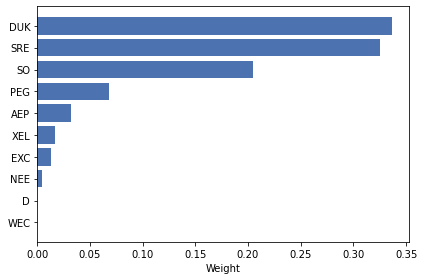

In [128]:

ef_pred7 = EfficientFrontier(mu, Sigma)
raw_weights_minvar_exp_pred7 = ef_pred7.min_volatility()

plot_weights(raw_weights_minvar_exp_pred7)
ef_pred7.portfolio_performance(verbose = True, risk_free_rate = 0.009)

Expected annual return: 32.5%
Annual volatility: 6.2%
Sharpe Ratio: 5.10


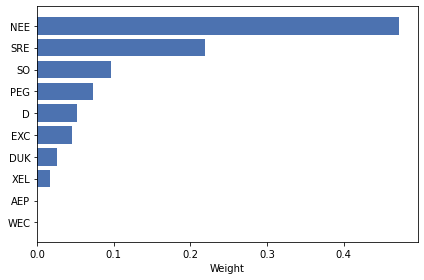

In [129]:

ef_pred7 = EfficientFrontier(mu, Sigma)
raw_weights_maxsharpe_exp = ef_pred7.max_sharpe(risk_free_rate=0.009)
Weight_Pred7  = raw_weights_maxsharpe_exp
plot_weights(raw_weights_maxsharpe_exp)
EAR_Pred7,AV1_Pred7,SR1_Pred7=ef_pred7.portfolio_performance(verbose = True, risk_free_rate = 0.009)

In [130]:
Weight_Pred7= raw_weights_maxsharpe_exp.values()

LISTValue_Pred7= list(Weight_Pred7)

SUMpredict_Pred7 = [dfNEECUM,dfDUKCUM,dfSOCUM,dfDCUM,dfEXCCUM,dfAEPCUM,dfSRECUM,dfXELCUM,dfPEGCUM,dfWECCUM]
hhhhh = np.mat(np.array(LISTValue_Pred7))*np.mat(np.array(SUMpredict_Pred7))

per_Pred7 = pd.DataFrame(hhhhh.T,columns = ['per_Pred7'])



PortfolioREAL_Daily_Return_Pred7 = portfolioREAL_Pred7.pct_change()

PortfolioREAL_cum_returns_Pred7 = (PortfolioREAL_Daily_Return_Pred7 + 1).cumprod()

kkkkkk = np.mat(np.array(PortfolioREAL_cum_returns_Pred7))*(np.mat(np.array(LISTValue_Pred7)).T)

perreal_Pred7 = pd.DataFrame(kkkkkk,columns = ['PerReal_Pred7'])

In [131]:
LISTEqualWeight = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]
SUMpredict = TESTCUM_pred1
Equ_Pred = np.mat(np.array(SUMpredict))*(np.mat(np.array(LISTEqualWeight)).T)

EquPred = pd.DataFrame(Equ_Pred,columns = ['Pred'])

In [132]:
LISTEqualWeight = [0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1,0.1]

Equ_actual = np.mat(np.array(PortfolioREAL_cum_returns_Pred1))*np.mat(np.array(LISTEqualWeight)).T
Equactual = pd.DataFrame(Equ_actual,columns = ['Act'])

In [133]:
Equactual.fillna(1, inplace=True)
EquPred.fillna(1, inplace=True)

# 预测部分

In [134]:
per_Pred1.fillna(1, inplace=True)
per_Pred2.fillna(1, inplace=True)
per_Pred3.fillna(1, inplace=True)
per_Pred4.fillna(1, inplace=True)
per_Pred5.fillna(1, inplace=True)
per_Pred6.fillna(1, inplace=True)
per_Pred7.fillna(1, inplace=True)

In [135]:

perPred2=per_Pred2.rename(columns={'per_Pred2':'Predict'})
perPred3=per_Pred3.rename(columns={'per_Pred3':'Predict'})
perPred4=per_Pred4.rename(columns={'per_Pred4':'Predict'})
perPred5=per_Pred5.rename(columns={'per_Pred5':'Predict'})
perPred6=per_Pred6.rename(columns={'per_Pred6':'Predict'})
perPred7=per_Pred7.rename(columns={'per_Pred7':'Predict'})

In [136]:
frames = [perPred2, 
          (perPred2.iloc[-1])*perPred3, 
          ((perPred2.iloc[-1])*perPred3.iloc[-1])*perPred4, 
          (((perPred2.iloc[-1])*perPred3.iloc[-1])*perPred4.iloc[-1])*perPred5, 
          ((((perPred2.iloc[-1])*perPred3.iloc[-1])*perPred4.iloc[-1])*perPred5.iloc[-1])*perPred6,
          (((((perPred2.iloc[-1])*perPred3.iloc[-1])*perPred4.iloc[-1])*perPred5.iloc[-1])*perPred6.iloc[-1])*perPred7]


In [137]:
PredictResult = pd.concat(frames,ignore_index=True)

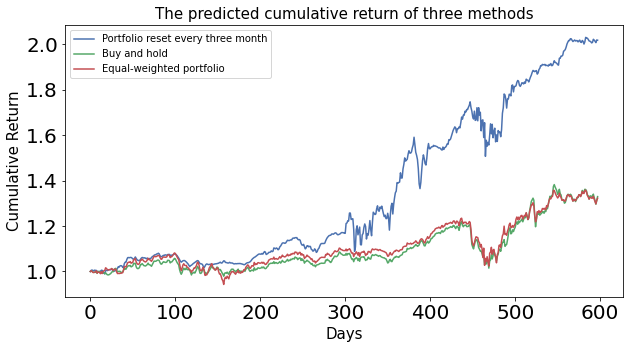

In [138]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Cumulative Return', fontsize=15)
plt.xlabel('Days', fontsize=15)

plt.plot(PredictResult)
plt.plot(per_Pred1)
plt.plot(EquPred)

plt.legend(['Portfolio reset every three month','Buy and hold','Equal-weighted portfolio'], loc='upper left', fontsize=10)
#df_pred[['Actual', 'Predicted']].plot()
plt.title('The predicted cumulative return of three methods', fontsize=15)
plt.show()

# 实际部分

In [139]:
ETFWeight = [16.43,8.22,7.38,6.84,4.72,4.70,4.43,4.08,3.4,3.25]
ETFSUMW = sum(ETFWeight)
for i in range(len(ETFWeight)):
    ETFWeight[i] = ETFWeight[i]/ETFSUMW 
ETF_actual = np.mat(np.array(PortfolioREAL_cum_returns_Pred1))*np.mat(np.array(ETFWeight)).T
ETFactual = pd.DataFrame(ETF_actual,columns = ['ETFAct'])

In [140]:
perreal_Pred1.fillna(1, inplace=True)
perreal_Pred2.fillna(1, inplace=True)
perreal_Pred3.fillna(1, inplace=True)
perreal_Pred4.fillna(1, inplace=True)
perreal_Pred5.fillna(1, inplace=True)
perreal_Pred6.fillna(1, inplace=True)
perreal_Pred7.fillna(1, inplace=True)

In [141]:

perrealPred2=perreal_Pred2.rename(columns={'PerReal_Pred2':'Actual'})
perrealPred3=perreal_Pred3.rename(columns={'PerReal_Pred3':'Actual'})

perrealPred4=perreal_Pred4.rename(columns={'PerReal_Pred4':'Actual'})
perrealPred5=perreal_Pred5.rename(columns={'PerReal_Pred5':'Actual'})

perrealPred6=perreal_Pred6.rename(columns={'PerReal_Pred6':'Actual'})
perrealPred7=perreal_Pred7.rename(columns={'PerReal_Pred7':'Actual'})

In [142]:
framesReal = [perrealPred2, 
          (perrealPred2.iloc[-1])*perrealPred3, 
          ((perrealPred2.iloc[-1])*perrealPred3.iloc[-1])*perrealPred4, 
          (((perrealPred2.iloc[-1])*perrealPred3.iloc[-1])*perrealPred4.iloc[-1])*perrealPred5, 
          ((((perrealPred2.iloc[-1])*perrealPred3.iloc[-1])*perrealPred4.iloc[-1])*perrealPred5.iloc[-1])*perrealPred6, 
          (((((perrealPred2.iloc[-1])*perrealPred3.iloc[-1])*perrealPred4.iloc[-1])*perrealPred5.iloc[-1])*perrealPred6.iloc[-1])*perrealPred7]
         

In [143]:
ActualResult = pd.concat(framesReal,ignore_index=True)

In [144]:
ActualResult1 = ActualResult.iloc[0:598]

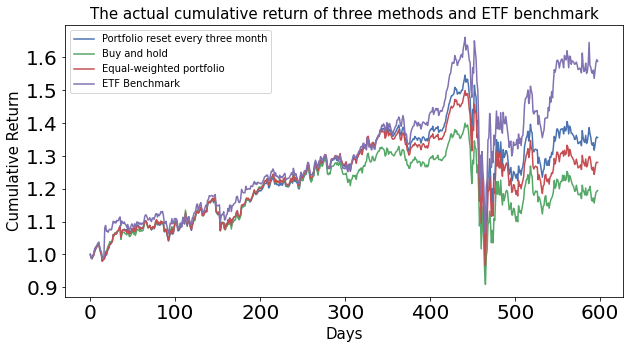

In [145]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))

plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel('Cumulative Return', fontsize=15)
plt.xlabel('Days', fontsize=15)

plt.plot(ETFactual)

plt.plot(perreal_Pred1)
plt.plot(Equactual)

plt.plot(ActualResult1)
plt.legend(['Portfolio reset every three month','Buy and hold','Equal-weighted portfolio','ETF Benchmark'], loc='upper left', fontsize=10)
#df_pred[['Actual', 'Predicted']].plot()
plt.title('The actual cumulative return of three methods and ETF benchmark', fontsize=15)
plt.show()

In [146]:
Equactual

,Act
0,1.000000
1,0.990138
2,0.986820
3,0.992625
4,0.996600
...,...
593,1.243564
594,1.258664
595,1.277511
596,1.280760


In [147]:
ActualResult.iloc[0:598]

,Actual
0,1.000000
1,0.989467
2,0.989376
3,0.995455
4,1.002815
...,...
593,1.535971
594,1.558665
595,1.582104
596,1.593007


In [148]:
perreal_Pred1

,PerReal_Pred1
0,1.000000
1,0.992133
2,0.990296
3,0.995255
4,1.000567
...,...
593,1.156377
594,1.173236
595,1.188276
596,1.191834


In [150]:

ssssss=pd.read_csv('EXC.csv')
t = ssssss['Date'][2412:3010]

In [175]:
AA = ActualResult1
BB = perreal_Pred1
CC = Equactual
DD = ETFactual
AA1 = AA-1
BB1 = BB-1
CC1 = CC-1
DD1 = DD-1

In [176]:


AAA = PredictResult
BBB = per_Pred1
CCC = EquPred
AAA1 = AAA-1
BBB1 = BBB-1
CCC1 = CCC-1

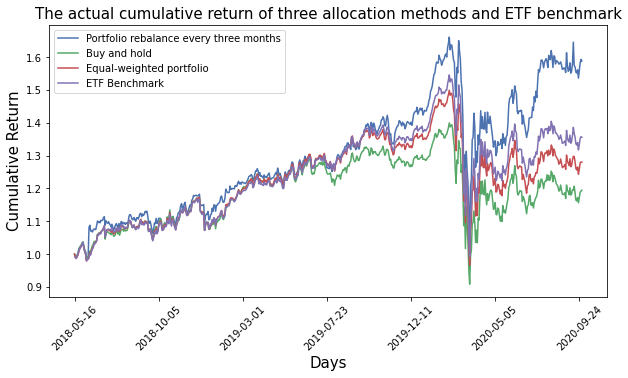

In [169]:
import matplotlib.ticker as ticker

#导入数据文件



#根据ticker的功能改变第一个为初始的数据，第二个则为距离
ticker_spacing = t
ticker_spacing = 99

#创建画布
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(t,ActualResult1)
ax.plot(t,perreal_Pred1)
ax.plot(t,Equactual)
ax.plot(t,ETFactual)

# 设置刻度字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# 设置坐标标签字体大小
ax.set_xlabel('Days', fontsize=15)
ax.set_ylabel('Cumulative Return', fontsize=15)
# 设置图例字体大小



ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
plt.xticks(rotation = 45)

plt.legend(['Portfolio rebalance every three months','Buy and hold','Equal-weighted portfolio','ETF Benchmark'],loc = 'upper left',fontsize=10)
plt.title('The actual cumulative return of three allocation methods and ETF benchmark',size = 15)
plt.show()


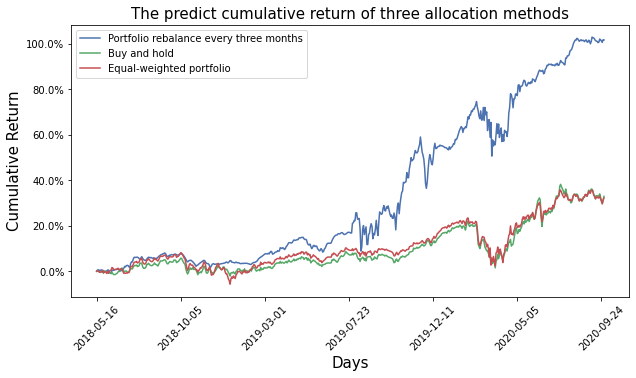

In [177]:


#根据ticker的功能改变第一个为初始的数据，第二个则为距离
ticker_spacing = t
ticker_spacing = 99

#创建画布
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(t, AAA1)
ax.plot(t,BBB1)
ax.plot(t,CCC1)



# 设置刻度字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# 设置坐标标签字体大小
ax.set_xlabel('Days', fontsize=15)
ax.set_ylabel('Cumulative Return', fontsize=15)
# 设置图例字体大小



ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.xticks(rotation = 45)

plt.legend(['Portfolio rebalance every three months','Buy and hold','Equal-weighted portfolio'],loc = 'upper left',fontsize=10)
plt.title('The predict cumulative return of three allocation methods',size = 15)
plt.show()

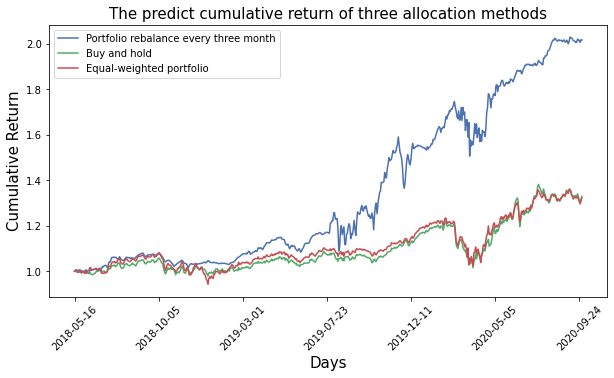

In [170]:


#根据ticker的功能改变第一个为初始的数据，第二个则为距离
ticker_spacing = t
ticker_spacing = 99

#创建画布
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(t, PredictResult)
ax.plot(t,per_Pred1)
ax.plot(t,EquPred)



# 设置刻度字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# 设置坐标标签字体大小
ax.set_xlabel('Days', fontsize=15)
ax.set_ylabel('Cumulative Return', fontsize=15)
# 设置图例字体大小



ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
plt.xticks(rotation = 45)

plt.legend(['Portfolio rebalance every three month','Buy and hold','Equal-weighted portfolio'],loc = 'upper left',fontsize=10)
plt.title('The predict cumulative return of three allocation methods',size = 15)
plt.show()

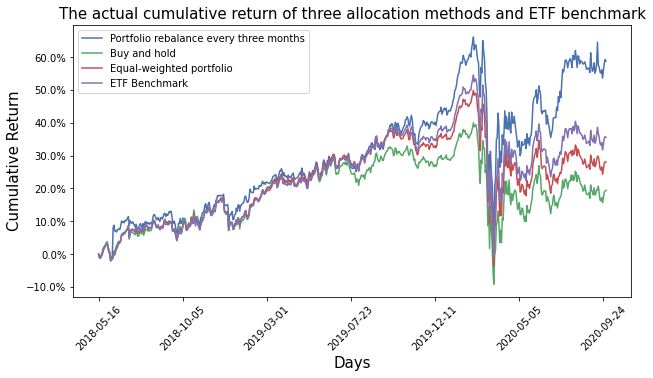

In [178]:
import matplotlib.ticker as ticker

#导入数据文件



#根据ticker的功能改变第一个为初始的数据，第二个则为距离
ticker_spacing = t
ticker_spacing = 99

#创建画布
fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(t,AA1)
ax.plot(t,BB1)
ax.plot(t,CC1)
ax.plot(t,DD1)

# 设置刻度字体大小
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
# 设置坐标标签字体大小
ax.set_xlabel('Days', fontsize=15)
ax.set_ylabel('Cumulative Return', fontsize=15)
# 设置图例字体大小



ax.xaxis.set_major_locator(ticker.MultipleLocator(ticker_spacing))
ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1, decimals=1))
plt.xticks(rotation = 45)

plt.legend(['Portfolio rebalance every three months','Buy and hold','Equal-weighted portfolio','ETF Benchmark'],loc = 'upper left',fontsize=10)
plt.title('The actual cumulative return of three allocation methods and ETF benchmark',size = 15)
plt.show()


In [155]:
Weight_Pred7

odict_values([0.4728573158922788, 0.026220819589476, 0.0960596095679014, 0.0513462343851582, 0.0456316706077038, 0.0, 0.218481250390661, 0.0164122846149742, 0.0729908149518466, 0.0])

In [156]:
Weight_Pred6

odict_values([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.5176927119580298, 0.0, 0.4823072880419703])

In [157]:
Weight_Pred5

odict_values([0.7836699879032226, 0.0, 0.1352973975162038, 0.0, 0.0409317792224583, 0.0401008353581153, 0.0, 0.0, 0.0, 0.0])

In [158]:
Weight_Pred4

odict_values([0.4119177347675949, 0.1342489381949381, 0.0, 0.0, 0.3144393109865634, 0.0, 0.0826542366268576, 0.0, 0.0567397794240462, 0.0])

In [159]:
Weight_Pred3

odict_values([0.0, 0.0, 0.0, 0.0, 0.9394229957735734, 0.0, 0.0605770042264267, 0.0, 0.0, 0.0])

In [160]:
Weight_Pred2

odict_values([0.0, 0.0, 0.0, 0.0, 0.2892494214014076, 0.0, 0.5822345230024178, 0.0, 0.1285160555961746, 0.0])

In [161]:
Weight_Pred1

odict_values([0.0196782642857447, 0.0, 0.0317578430197537, 0.1995990543764658, 0.1478394450307028, 0.1650876447616822, 0.0344680371698093, 0.1395173679289389, 0.2620523434269024, 0.0])

In [164]:
PredictResult.iloc[-1]

Predict    2.017926
Name: 597, dtype: float64

In [165]:
per_Pred1.iloc[-1]

per_Pred1    1.329575
Name: 597, dtype: float64

In [166]:
EquPred.iloc[-1]

Pred    1.32209
Name: 597, dtype: float64

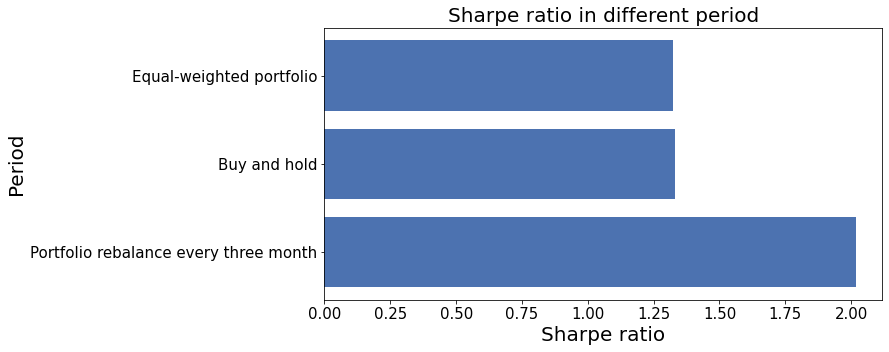

In [167]:
sharpe_ratio = [2.017926, 1.329575 , 1.32209]
index = ['Portfolio rebalance every three month','Buy and hold','Equal-weighted portfolio']


plt.figure(figsize=(10,5))
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Period', fontsize=20)
plt.xlabel('Sharpe ratio', fontsize=20)


plt.barh(range(len(index)),sharpe_ratio ,tick_label = index)


plt.title('Sharpe ratio in different period', fontsize=20)
plt.show()

In [171]:
ActualResult1.iloc[-1]



Actual    1.587866
Name: 597, dtype: float64

In [172]:
perreal_Pred1.iloc[-1]


PerReal_Pred1    1.194529
Name: 597, dtype: float64

In [173]:
Equactual.iloc[-1]


Act    1.280164
Name: 597, dtype: float64

In [174]:
ETFactual.iloc[-1]

ETFAct    1.35588
Name: 597, dtype: float64